In [1825]:
# importing required libraries
import numpy as np
import pandas as pd
from pathlib import Path
# importing matplotlib
import matplotlib.pyplot as plt

# display plots in the notebook itself
%matplotlib inline

import seaborn as sns
from scipy.special import jv

from sklearn.model_selection import train_test_split #train data set sampler

from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

import statsmodels.api as sm  #statsModel

from sklearn.feature_selection import RFE #RFE

from statsmodels.stats.outliers_influence import variance_inflation_factor #VIF

from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

import os
#import the necessary libraries
import warnings
warnings.filterwarnings("ignore")


# Linear Regression
## Housing Sale Case Study


A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.

#### Problem Statement:
- Build a regression model using regularisation in order to predict the actual value of the prospective properties

Essentially, the company wants —
- Decide whether to invest in house or not
- Which variables are significant in predicting the price of a house, and
- How well those variables describe the Sale Price of a house.



In [1826]:
df = pd.read_csv('train.csv')
df = df.rename(columns=lambda x: x.strip())
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Identifying shape of the data

In [1827]:
df.shape

(1460, 81)

## Data reading and understanding

Cleaning the dataset using following steps:
 - Drop columns with all null values
 - Drop columns with having only one, non null value
 - Drop columns that are not going to effect the driving factors
 - Validate internal rules
 - Check for all categorical variables and convert those to correct data types
 
 #### Using SalePrice as target column

### Checking Null count

In [1828]:
df.isnull().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageYrBlt        81
GarageCond         81
GarageType         81
GarageFinish       81
GarageQual         81
BsmtFinType2       38
BsmtExposure       38
BsmtQual           37
BsmtCond           37
BsmtFinType1       37
MasVnrArea          8
MasVnrType          8
Electrical          1
Id                  0
Functional          0
Fireplaces          0
KitchenQual         0
KitchenAbvGr        0
BedroomAbvGr        0
HalfBath            0
FullBath            0
BsmtHalfBath        0
TotRmsAbvGrd        0
GarageCars          0
GrLivArea           0
GarageArea          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
BsmtFullBath        0
HeatingQC 

<font size="4">As most of the variables above which has null values are categorical variables and based on the data dictionary, it can be seen that NA can be assigned to null values</font>

In [1829]:
df['PoolQC'].fillna('NA', inplace=True)
df['MiscFeature'].fillna('NA', inplace=True)
df['Alley'].fillna('NA', inplace=True)
df['Fence'].fillna('NA', inplace=True)
df['FireplaceQu'].fillna('NA', inplace=True)

               

In [1830]:
df.isnull().sum().sort_values(ascending=False)

LotFrontage      259
GarageFinish      81
GarageCond        81
GarageYrBlt       81
GarageQual        81
GarageType        81
BsmtFinType2      38
BsmtExposure      38
BsmtCond          37
BsmtFinType1      37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
BsmtHalfBath       0
BsmtFullBath       0
FireplaceQu        0
Fireplaces         0
FullBath           0
Functional         0
HalfBath           0
KitchenQual        0
KitchenAbvGr       0
BedroomAbvGr       0
TotRmsAbvGrd       0
Id                 0
LowQualFinSF       0
PoolQC             0
SaleCondition      0
SaleType           0
YrSold             0
MoSold             0
MiscVal            0
MiscFeature        0
Fence              0
PoolArea           0
GarageCars         0
ScreenPorch        0
3SsnPorch          0
EnclosedPorch      0
OpenPorchSF        0
WoodDeckSF         0
PavedDrive         0
GarageArea         0
GrLivArea          0
HeatingQC          0
2ndFlrSF           0
LotConfig    

In [1831]:
df['LotFrontage'].value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
65.0      44
85.0      40
78.0      25
21.0      23
90.0      23
68.0      19
64.0      19
24.0      19
73.0      18
55.0      17
63.0      17
79.0      17
72.0      17
100.0     16
66.0      15
74.0      15
51.0      15
52.0      14
59.0      13
82.0      12
71.0      12
67.0      12
43.0      12
40.0      12
57.0      12
76.0      11
69.0      11
92.0      10
34.0      10
53.0      10
86.0      10
88.0      10
84.0       9
35.0       9
62.0       9
44.0       9
77.0       9
93.0       8
98.0       8
96.0       8
61.0       8
95.0       7
58.0       7
120.0      7
107.0      7
94.0       6
81.0       6
36.0       6
30.0       6
48.0       6
91.0       6
41.0       6
54.0       6
89.0       6
110.0      6
105.0      6
32.0       5
47.0       5
87.0       5
56.0       5
37.0       5
83.0       5
102.0      4
42.0       4
49.0       4
104.0      3
103.0      3
99.0       3
45.0       3
108.0      3
130.0      3
124.0      2

In [1832]:
# Now the values in numbers to be replaced with zero 

df['LotFrontage'].fillna(0, inplace=True)

In [1833]:
# Again categorical variables filling with NA

df['GarageFinish'].fillna('NA', inplace=True)
df['GarageCond'].fillna('NA', inplace=True)
df['GarageQual'].fillna('NA', inplace=True)

In [1834]:
df.isnull().sum().sort_values(ascending=False)

GarageYrBlt      81
GarageType       81
BsmtExposure     38
BsmtFinType2     38
BsmtQual         37
BsmtCond         37
BsmtFinType1     37
MasVnrArea        8
MasVnrType        8
Electrical        1
BedroomAbvGr      0
KitchenAbvGr      0
HalfBath          0
KitchenQual       0
LowQualFinSF      0
BsmtFullBath      0
FullBath          0
BsmtHalfBath      0
TotRmsAbvGrd      0
Functional        0
Fireplaces        0
FireplaceQu       0
Id                0
GarageFinish      0
PoolArea          0
SaleCondition     0
SaleType          0
YrSold            0
MoSold            0
MiscVal           0
MiscFeature       0
Fence             0
PoolQC            0
ScreenPorch       0
GarageCars        0
3SsnPorch         0
EnclosedPorch     0
OpenPorchSF       0
WoodDeckSF        0
PavedDrive        0
GarageCond        0
GarageQual        0
GarageArea        0
GrLivArea         0
HeatingQC         0
2ndFlrSF          0
1stFlrSF          0
HouseStyle        0
BldgType          0
Condition2        0


In [1835]:
# Again categorical variables filling with NA
df['GarageType'].fillna('NA', inplace=True)
df['BsmtExposure'].fillna('NA', inplace=True)
df['BsmtFinType2'].fillna('NA', inplace=True)
df['BsmtQual'].fillna('NA', inplace=True)     

In [1836]:
df.isnull().sum().sort_values(ascending=False)

GarageYrBlt      81
BsmtFinType1     37
BsmtCond         37
MasVnrType        8
MasVnrArea        8
Electrical        1
BsmtHalfBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0
BsmtFullBath      0
KitchenAbvGr      0
GrLivArea         0
KitchenQual       0
TotRmsAbvGrd      0
Functional        0
Fireplaces        0
LowQualFinSF      0
2ndFlrSF          0
FireplaceQu       0
GarageType        0
Id                0
1stFlrSF          0
PoolArea          0
SaleCondition     0
SaleType          0
YrSold            0
MoSold            0
MiscVal           0
MiscFeature       0
Fence             0
PoolQC            0
ScreenPorch       0
GarageCars        0
3SsnPorch         0
EnclosedPorch     0
OpenPorchSF       0
WoodDeckSF        0
PavedDrive        0
GarageCond        0
GarageQual        0
GarageArea        0
GarageFinish      0
HeatingQC         0
CentralAir        0
OverallCond       0
HouseStyle        0
BldgType          0
Condition2        0
Condition1        0


In [1837]:
# Again categorical variables filling with NA
df['BsmtFinType1'].fillna('NA', inplace=True)
df['BsmtCond'].fillna('NA', inplace=True)

# Now the variable here is None not NA
df['MasVnrType'].fillna('None', inplace=True)
       
# Now the values in numbers to be replaced with zero 
df['MasVnrArea'].fillna(0, inplace=True)

In [1838]:
df.isnull().sum().sort_values(ascending=False)

GarageYrBlt      81
Electrical        1
CentralAir        0
GarageType        0
FireplaceQu       0
Fireplaces        0
Functional        0
TotRmsAbvGrd      0
KitchenQual       0
KitchenAbvGr      0
BedroomAbvGr      0
HalfBath          0
FullBath          0
BsmtHalfBath      0
BsmtFullBath      0
GrLivArea         0
LowQualFinSF      0
2ndFlrSF          0
1stFlrSF          0
GarageFinish      0
Id                0
GarageArea        0
PoolQC            0
SaleCondition     0
SaleType          0
YrSold            0
MoSold            0
MiscVal           0
MiscFeature       0
Fence             0
PoolArea          0
GarageQual        0
ScreenPorch       0
3SsnPorch         0
EnclosedPorch     0
OpenPorchSF       0
WoodDeckSF        0
PavedDrive        0
GarageCond        0
GarageCars        0
HeatingQC         0
MSSubClass        0
Heating           0
OverallCond       0
OverallQual       0
HouseStyle        0
BldgType          0
Condition2        0
Condition1        0
Neighborhood      0


In [1839]:
# dropping null value for electrical

df = df[~df['Electrical'].isnull()]  

In [1840]:
# 81 garages has no types hence the garageYrBlt is also null

df['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     87
NA          81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [1841]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   object 
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          1459 non-null   object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1459 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

Below variable are categorical variables and should have object data type rather than int or float - checked with value_counts()
- MSSubClass    
- OverallQual    
- OverallCond    
- BsmtFullBath   
- BsmtHalfBath
- FullBath
- HalfBath
- BedroomAbvGr
- KitchenAbvGr
- TotRmsAbvGrd
- Fireplaces
- GarageCars

In [1842]:
# Converting above columns to object type to have those used as categorical variables
df[
    ['MSSubClass',
     'OverallQual',
     'OverallCond',
     'BsmtFullBath',
     'BsmtHalfBath',
     'FullBath',
     'HalfBath',
     'BedroomAbvGr',
     'KitchenAbvGr',
     'TotRmsAbvGrd',
     'Fireplaces',
     'GarageCars'
    ]
] = df[
    ['MSSubClass',
     'OverallQual',
     'OverallCond',
     'BsmtFullBath',
     'BsmtHalfBath',
     'FullBath',
     'HalfBath',
     'BedroomAbvGr',
     'KitchenAbvGr',
     'TotRmsAbvGrd',
     'Fireplaces',
     'GarageCars'
    ]
].astype('object')

In [1843]:
df[['MSSubClass',
     'OverallQual',
     'OverallCond',
     'BsmtFullBath',
     'BsmtHalfBath',
     'FullBath',
     'HalfBath',
     'BedroomAbvGr',
     'KitchenAbvGr',
     'TotRmsAbvGrd',
     'Fireplaces',
     'GarageCars'
    ]].dtypes


MSSubClass      object
OverallQual     object
OverallCond     object
BsmtFullBath    object
BsmtHalfBath    object
FullBath        object
HalfBath        object
BedroomAbvGr    object
KitchenAbvGr    object
TotRmsAbvGrd    object
Fireplaces      object
GarageCars      object
dtype: object

### Removing unwanted columns
- PoolQC has only 7 of having pools, so lets drop this column
- Id column is just the index number

In [1844]:
### PoolQC has only 7 of having pools, so lets drop this column
df['PoolQC'].value_counts()

NA    1452
Gd       3
Ex       2
Fa       2
Name: PoolQC, dtype: int64

In [1845]:
df = df.drop(['PoolQC', 'Id'], axis=1)

In [1846]:
df.shape

(1459, 79)

### Exploratory Data Analysis (EDA) 

In [1847]:
plt.style.use("ggplot")

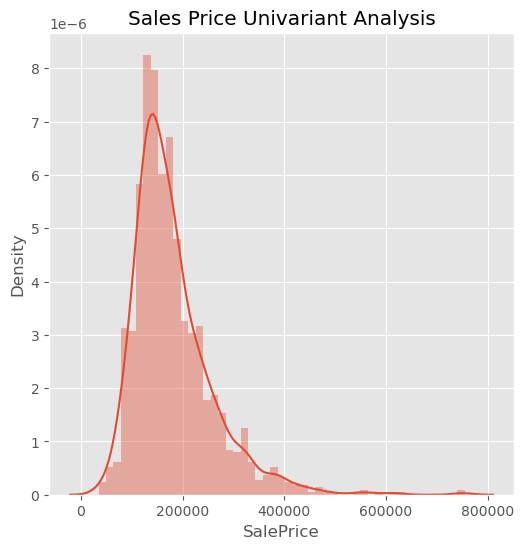

In [1848]:
# Univariant Analysis
plt.figure(figsize=[6,6])
sns.distplot(df['SalePrice'])
plt.title('Sales Price Univariant Analysis')
plt.show()

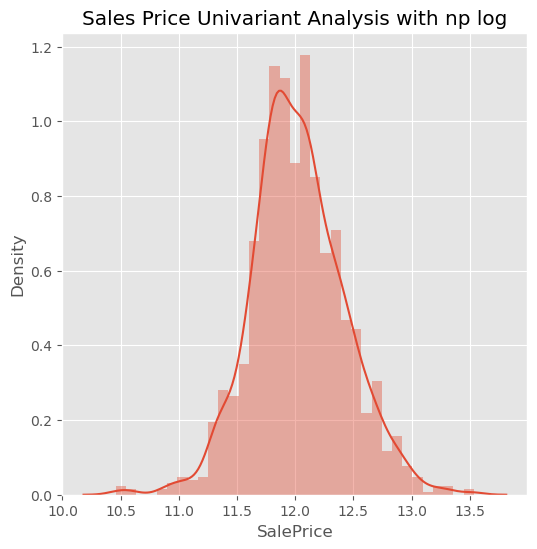

In [1849]:
# Univariant Analysis with np log
plt.figure(figsize=[6,6])
sns.distplot(np.log(df['SalePrice']))
plt.title('Sales Price Univariant Analysis with np log')
plt.show()

#### Data Exploration

To perform linear regression, the (numeric) target variable should be linearly related to *at least one another numeric variable*.
Let's take subset the list of all (independent) numeric variables, and then make a pairwise plot.

In [1850]:
# all numeric (float and int) variables present in df
df_numeric = df.select_dtypes(include=['float64', 'int64'])
df_numeric.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,65.0,8450,2003,2003,196.0,706,0,150,856,856,...,0,61,0,0,0,0,0,2,2008,208500
1,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,...,298,0,0,0,0,0,0,5,2007,181500
2,68.0,11250,2001,2002,162.0,486,0,434,920,920,...,0,42,0,0,0,0,0,9,2008,223500
3,60.0,9550,1915,1970,0.0,216,0,540,756,961,...,0,35,272,0,0,0,0,2,2006,140000
4,84.0,14260,2000,2000,350.0,655,0,490,1145,1145,...,192,84,0,0,0,0,0,12,2008,250000


In [1851]:
# Year/months should be used as categorised variable
df_numeric = df_numeric.drop(['YearBuilt','YrSold', 'MoSold', 'YearRemodAdd','GarageYrBlt'], axis=1)
df_numeric.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,65.0,8450,196.0,706,0,150,856,856,854,0,1710,548,0,61,0,0,0,0,0,208500
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,460,298,0,0,0,0,0,0,181500
2,68.0,11250,162.0,486,0,434,920,920,866,0,1786,608,0,42,0,0,0,0,0,223500
3,60.0,9550,0.0,216,0,540,756,961,756,0,1717,642,0,35,272,0,0,0,0,140000
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,2198,836,192,84,0,0,0,0,0,250000


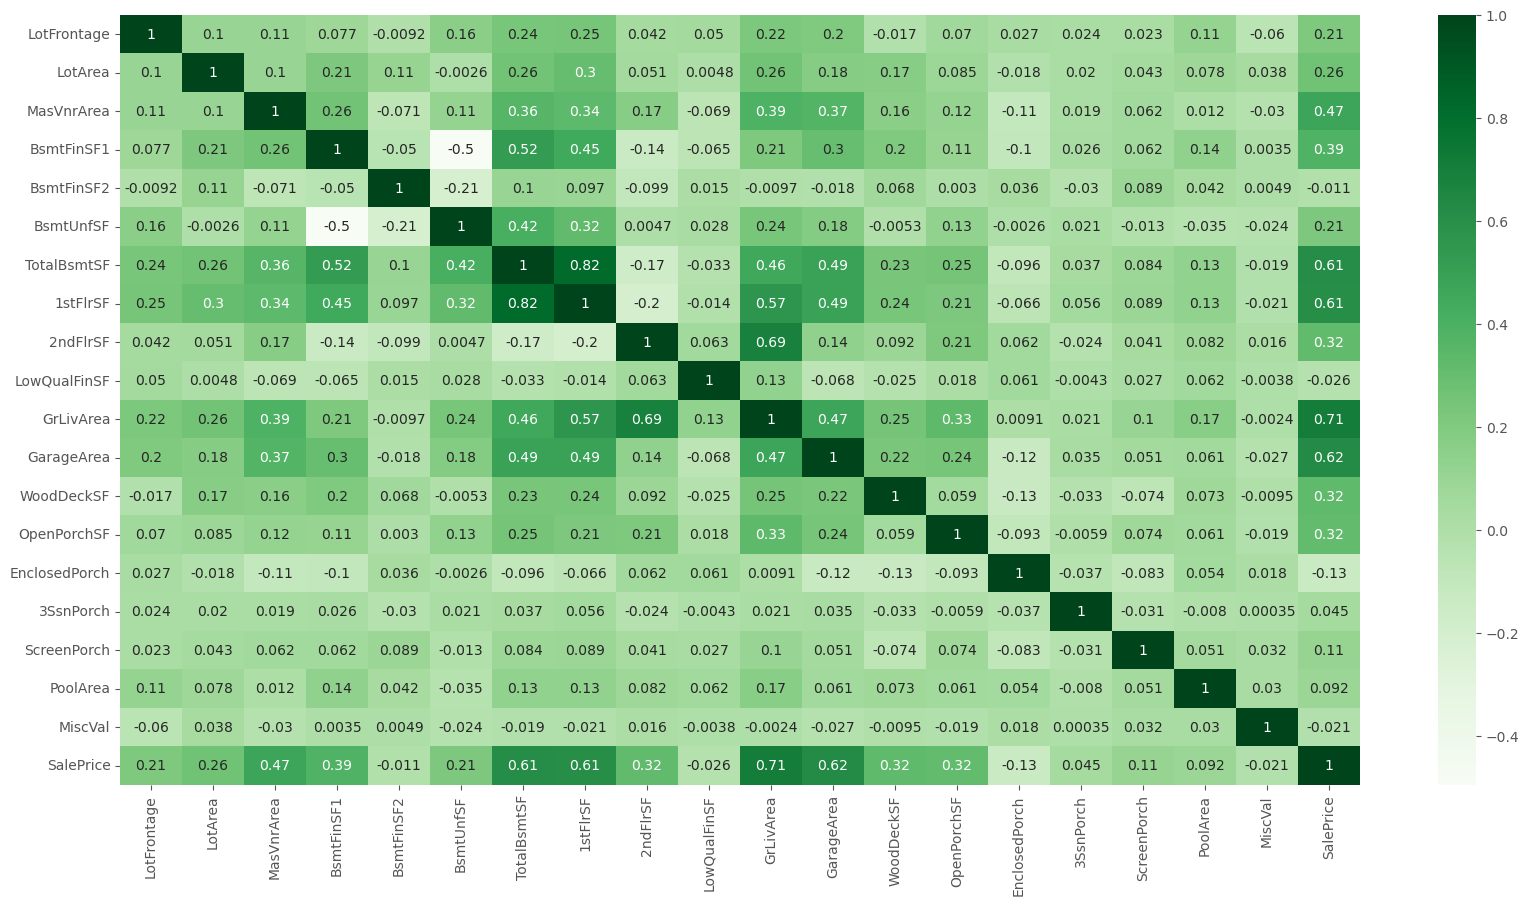

In [1852]:
# correlation matrix
corr = df_numeric.corr()

# figure size
plt.figure(figsize=(20,10))

# heatmap
sns.heatmap(corr, cmap="Greens", annot=True)
plt.show()


The heatmap shows some useful insights:

Correlation of SalePrice with independent variables:
- Price is highly (positively) correlated with GrLivArea, GarageArea, TotalBsmtSF, 1stFlrSF, MasVnrArea

- Price is negatively correlated to ```MicsVal``` and ```EnclosePorch``` 


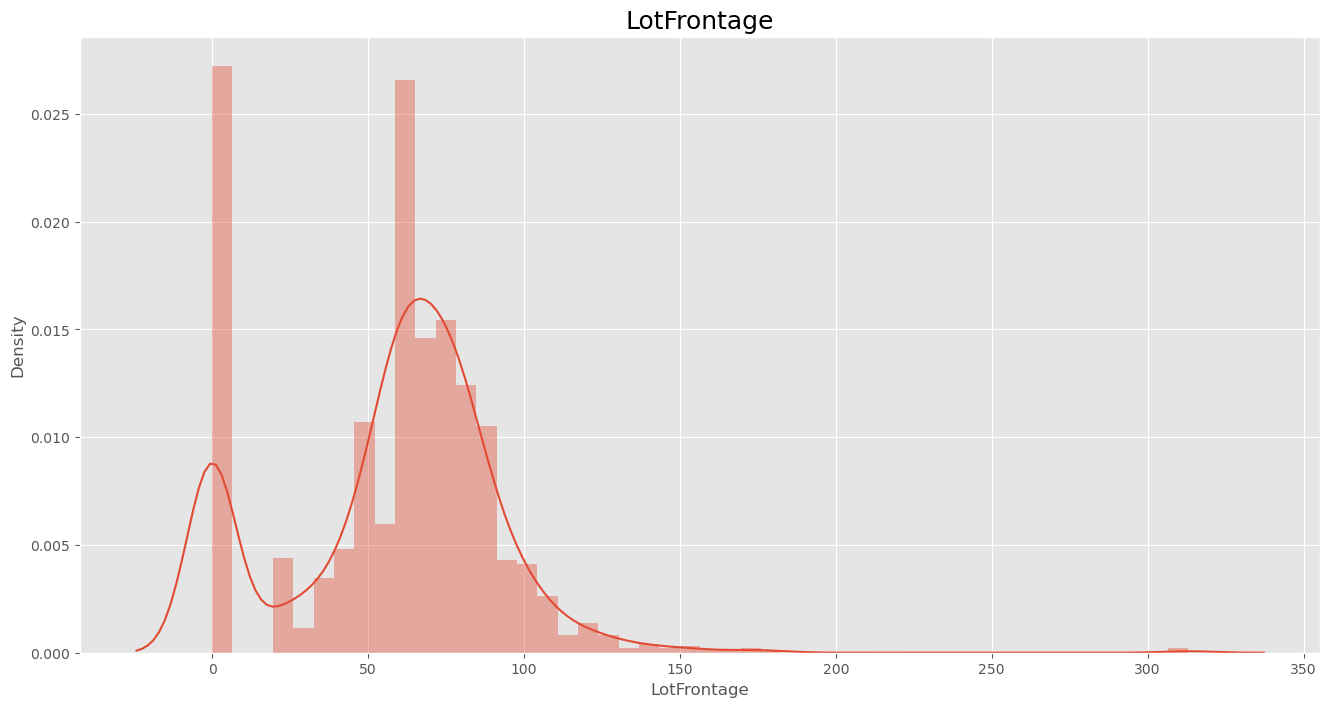

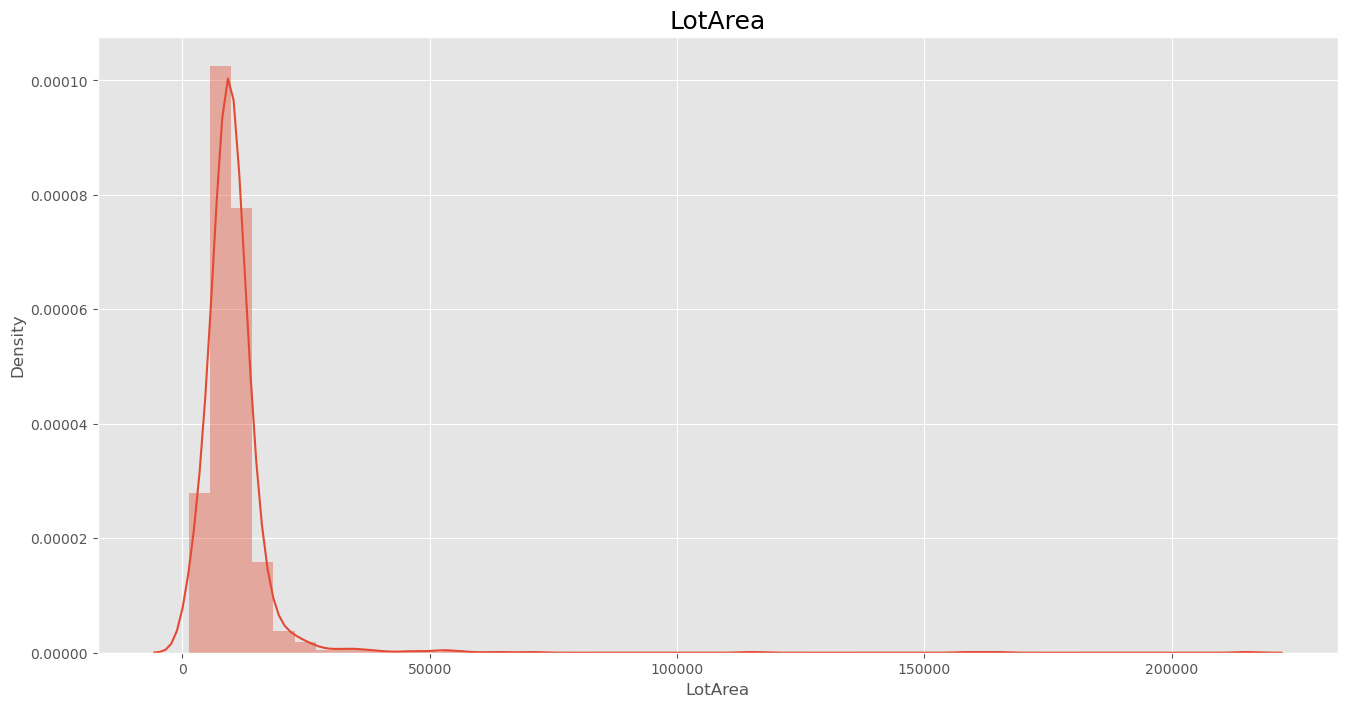

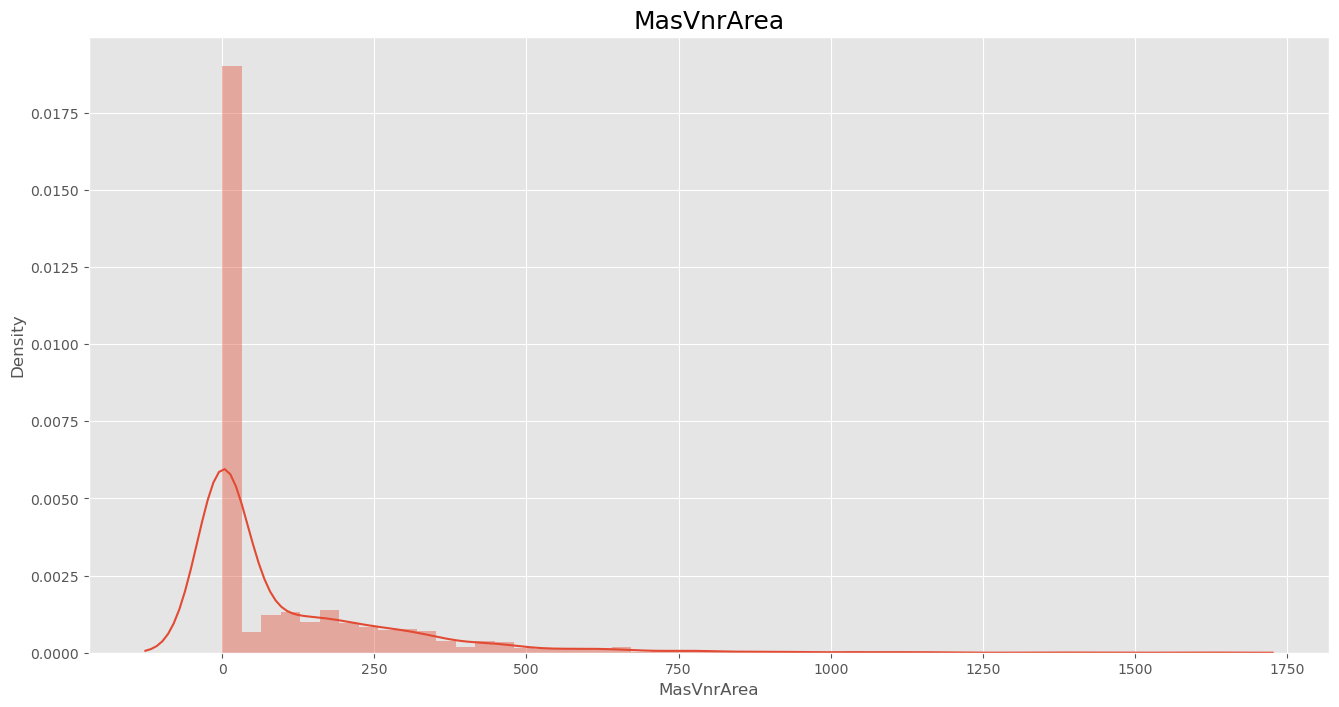

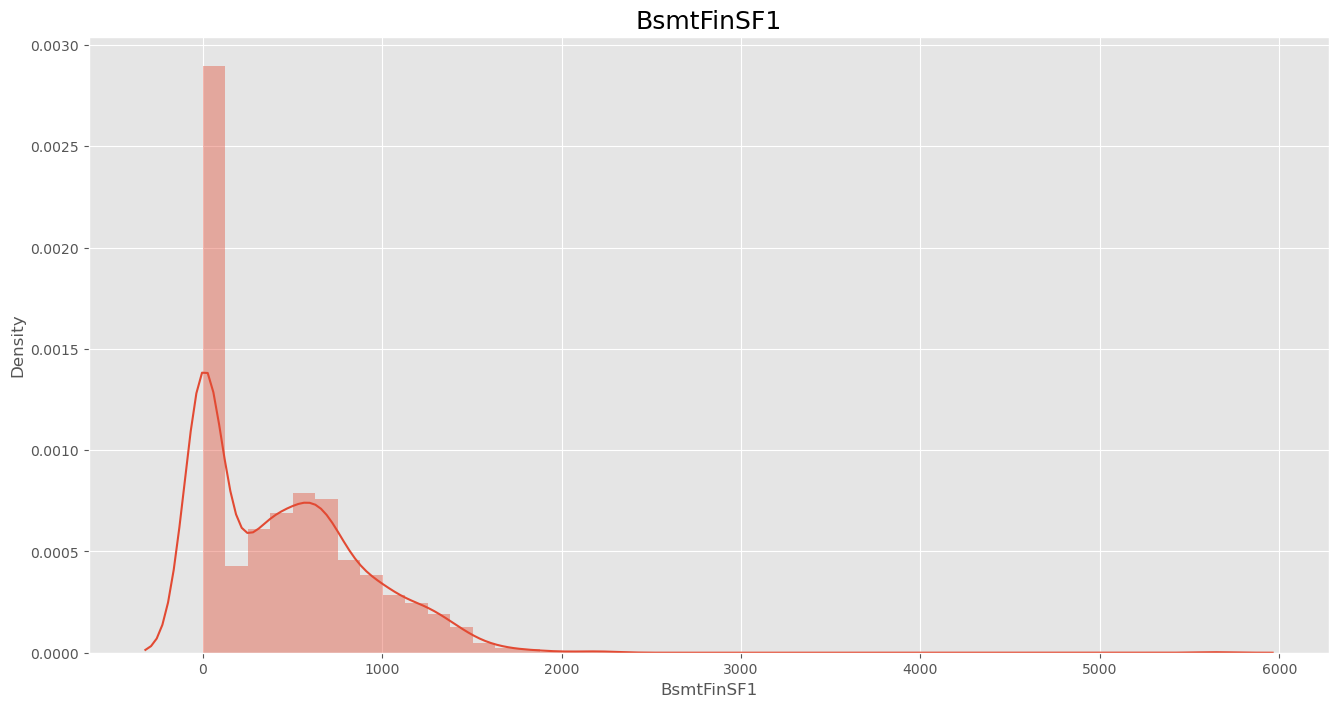

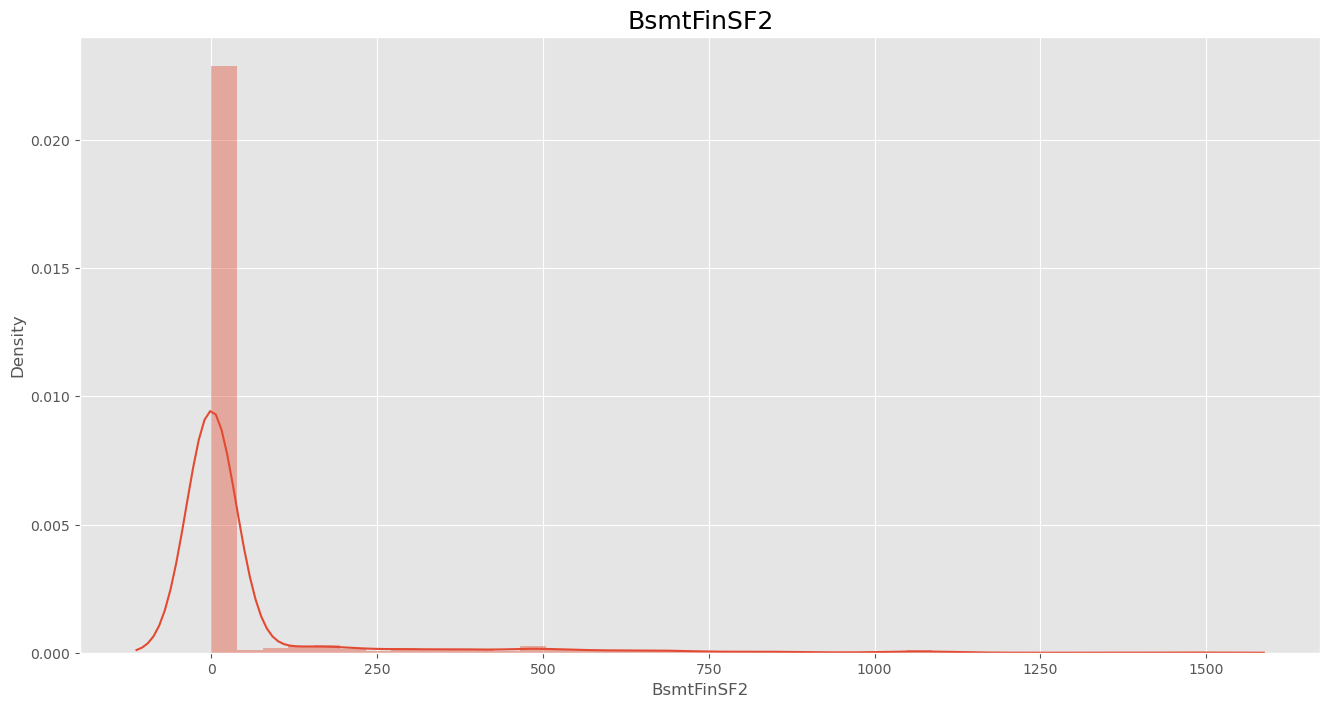

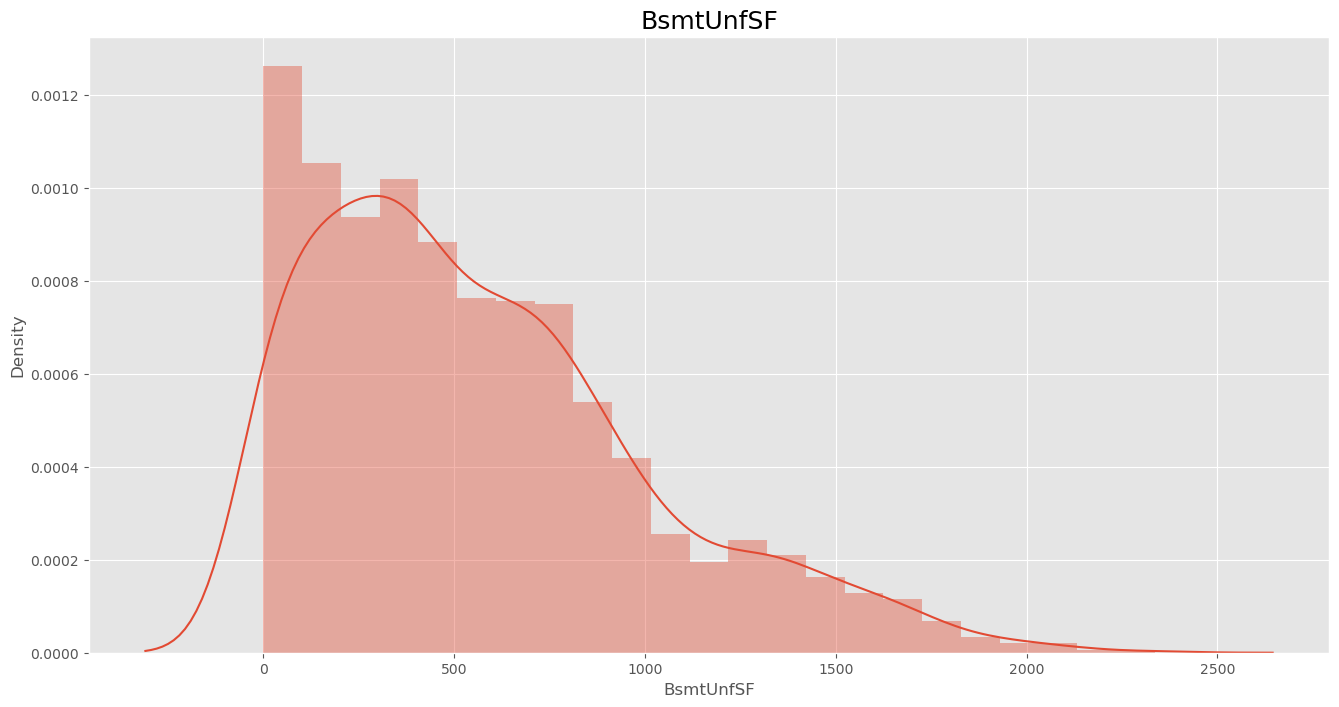

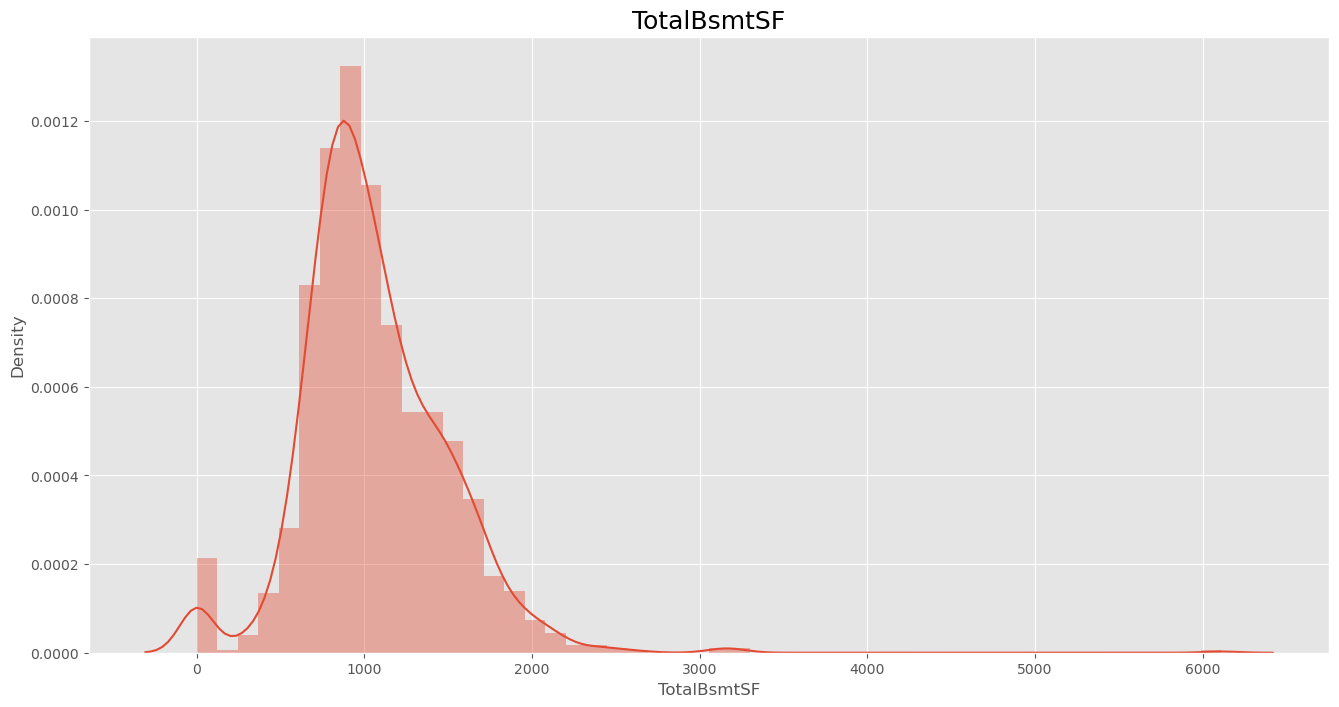

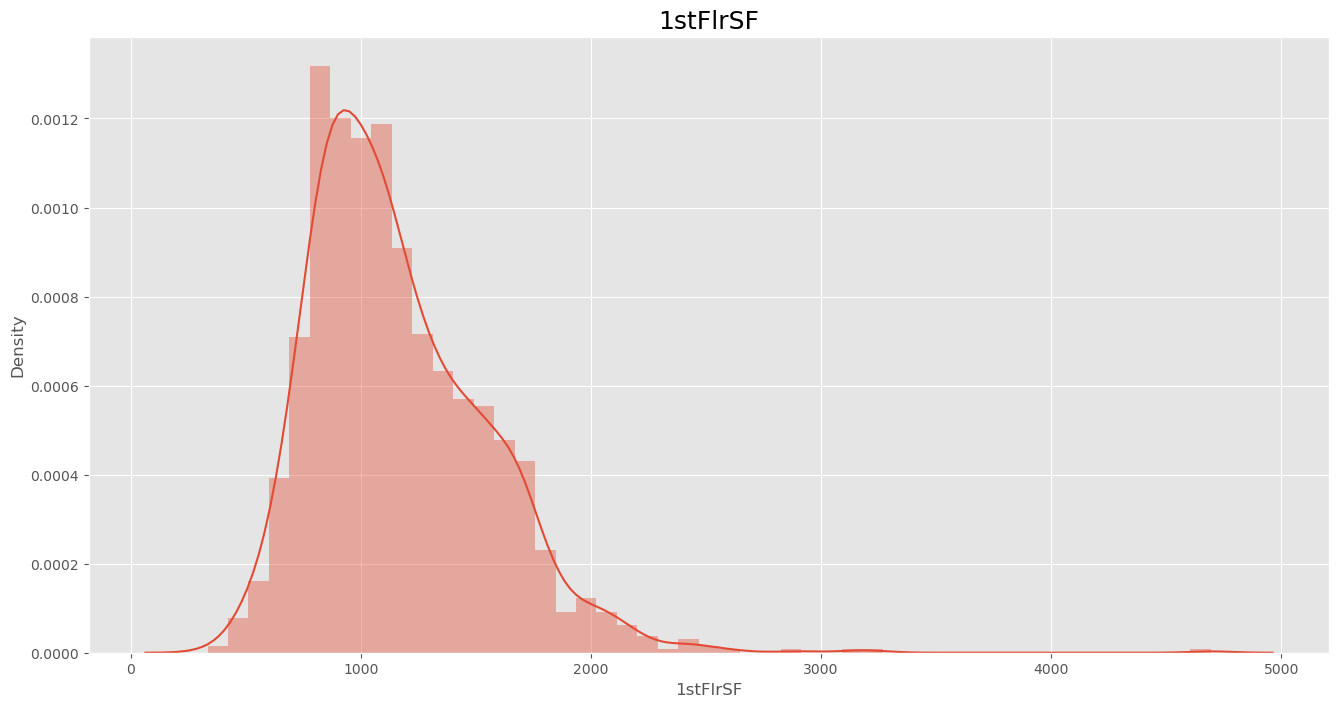

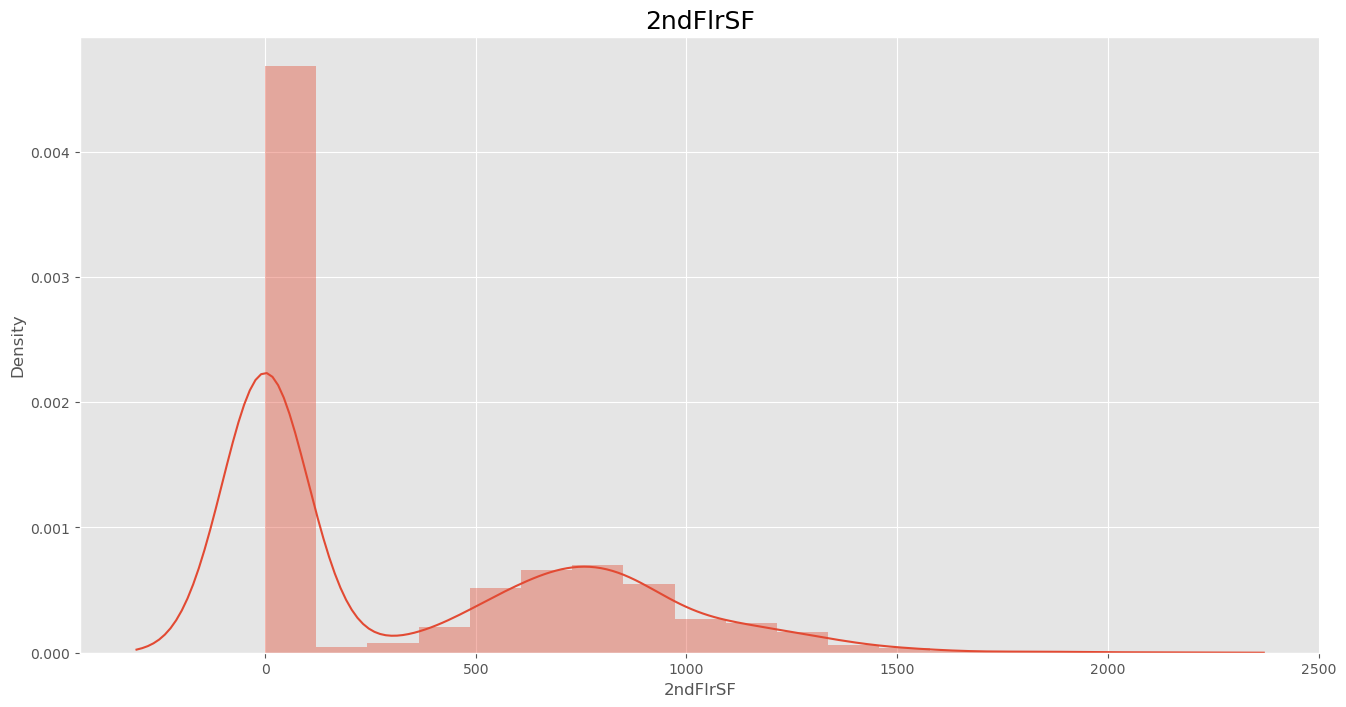

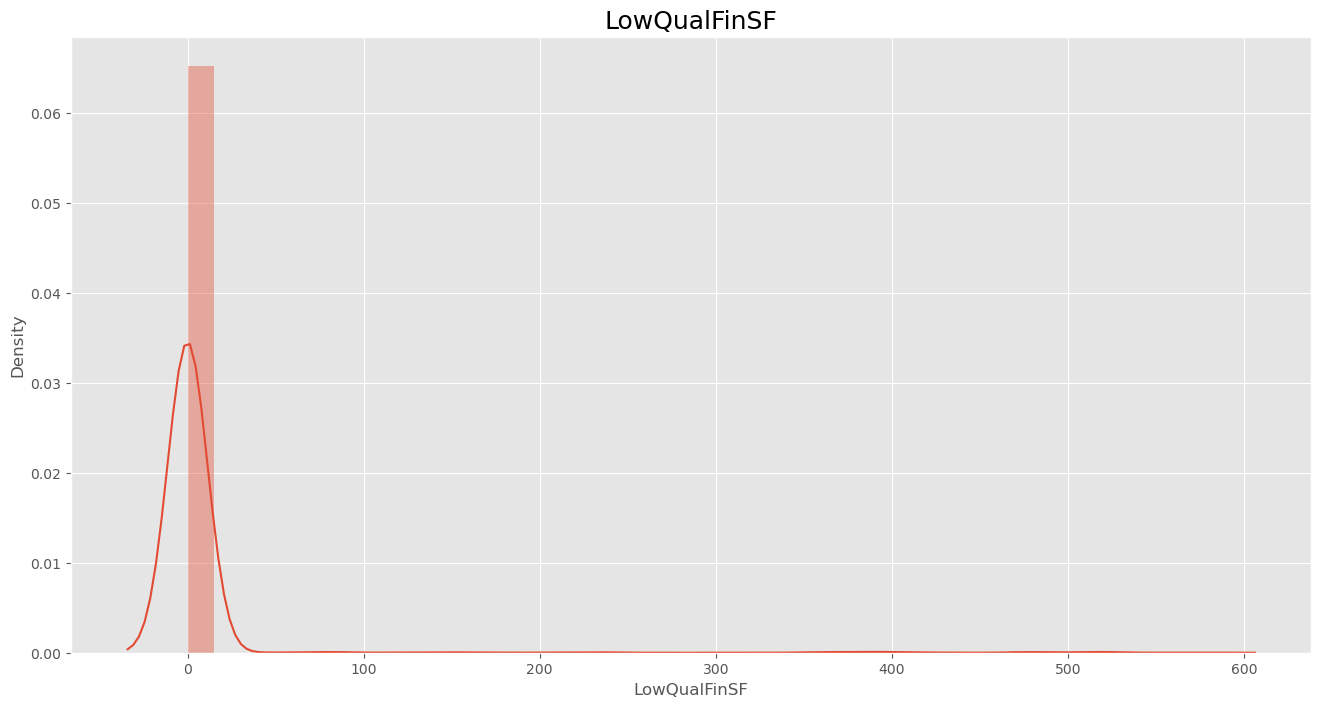

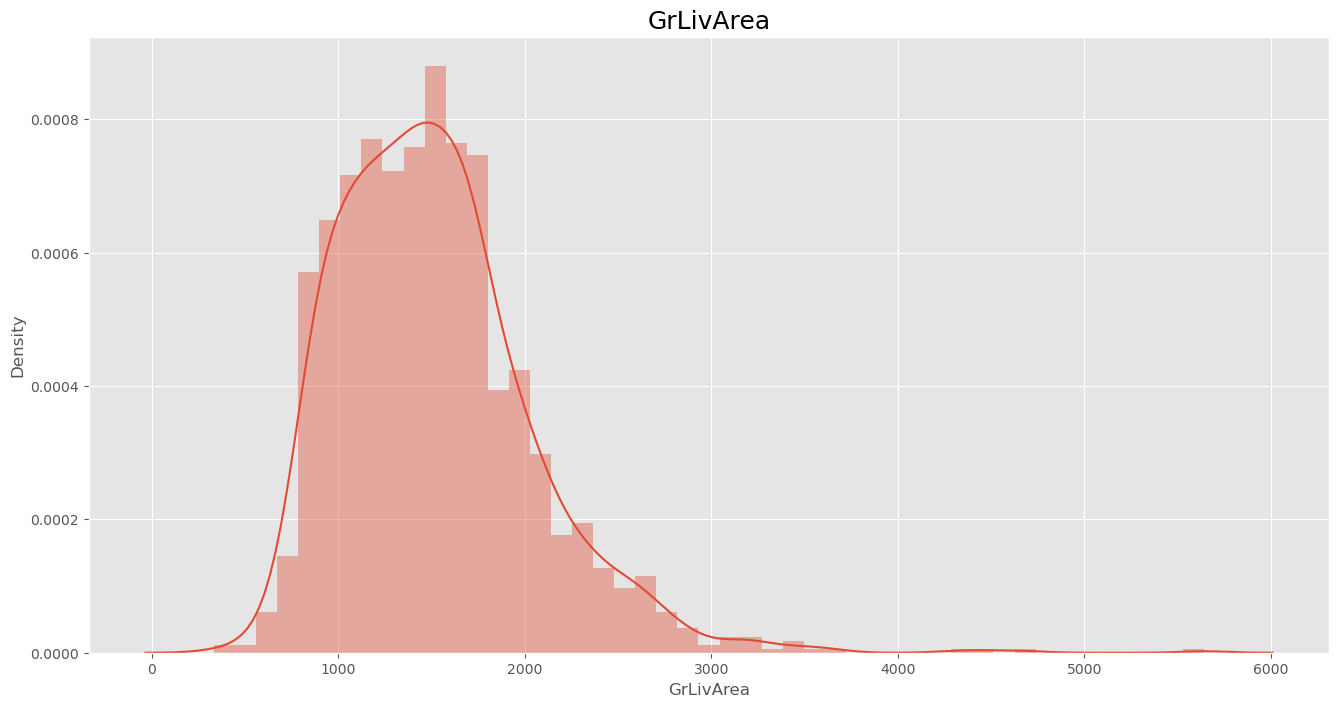

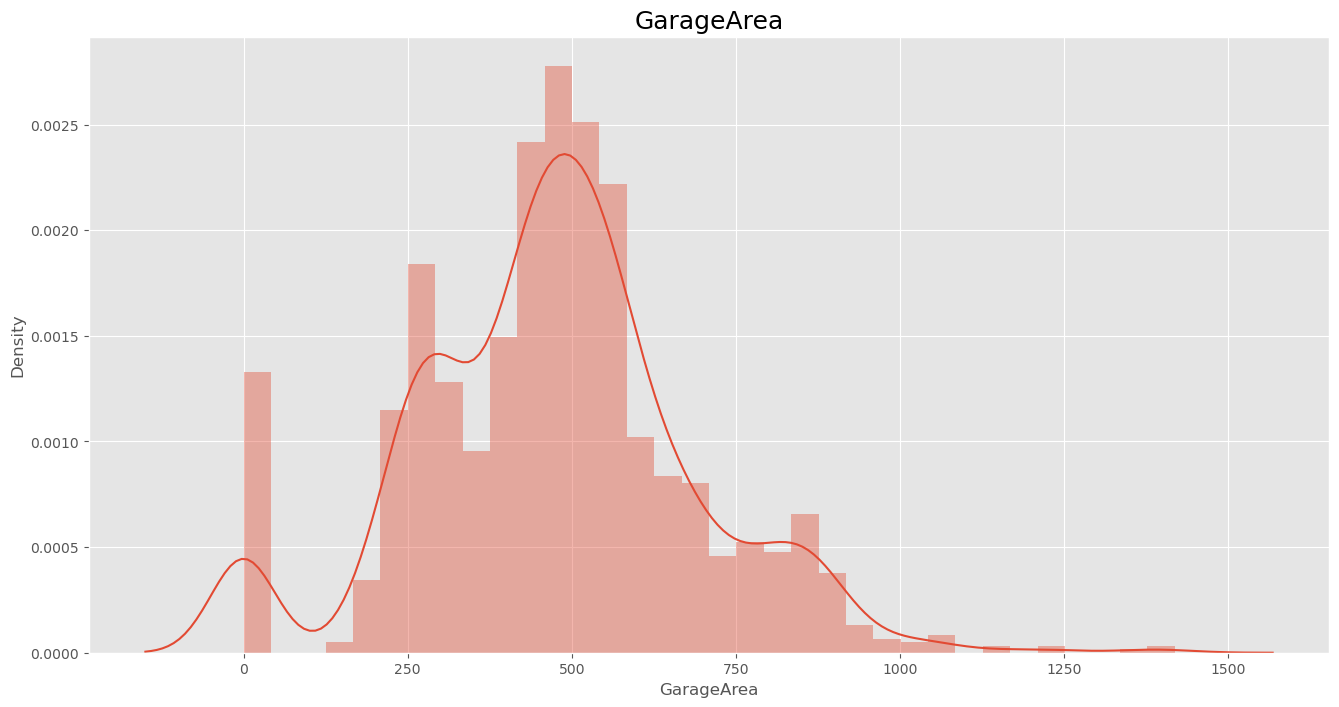

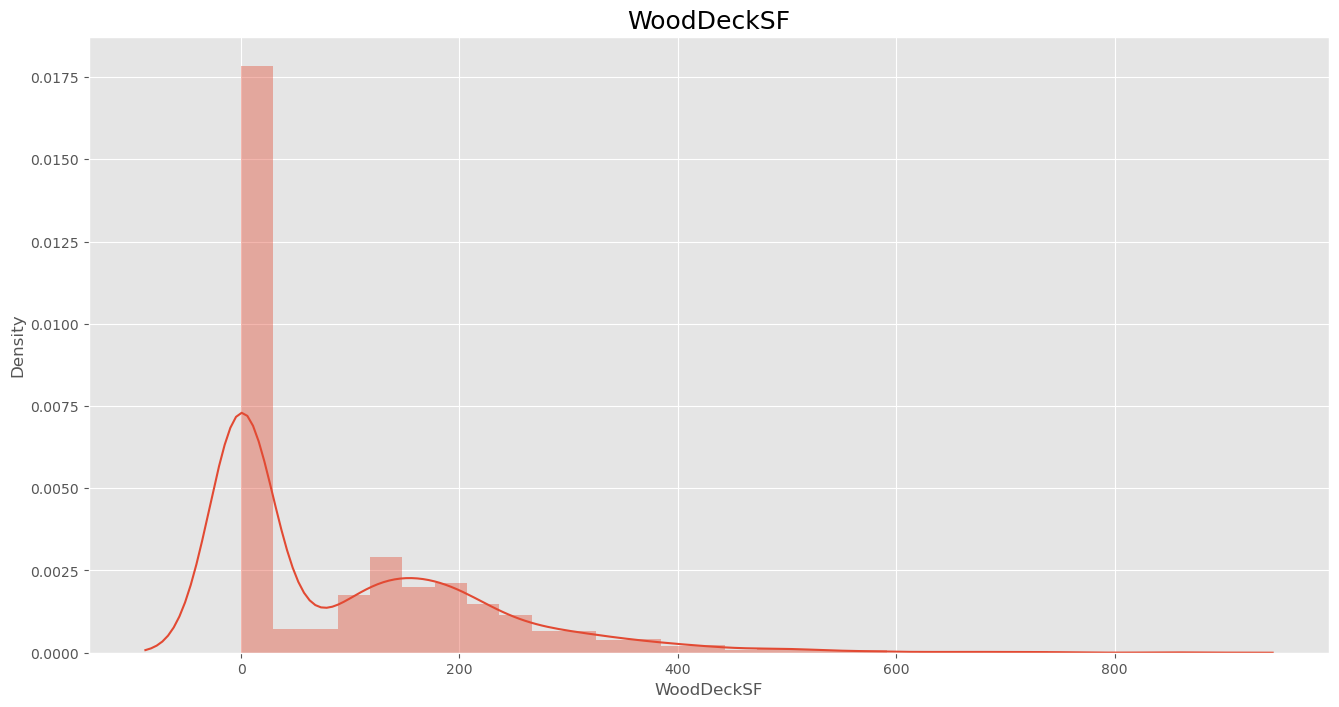

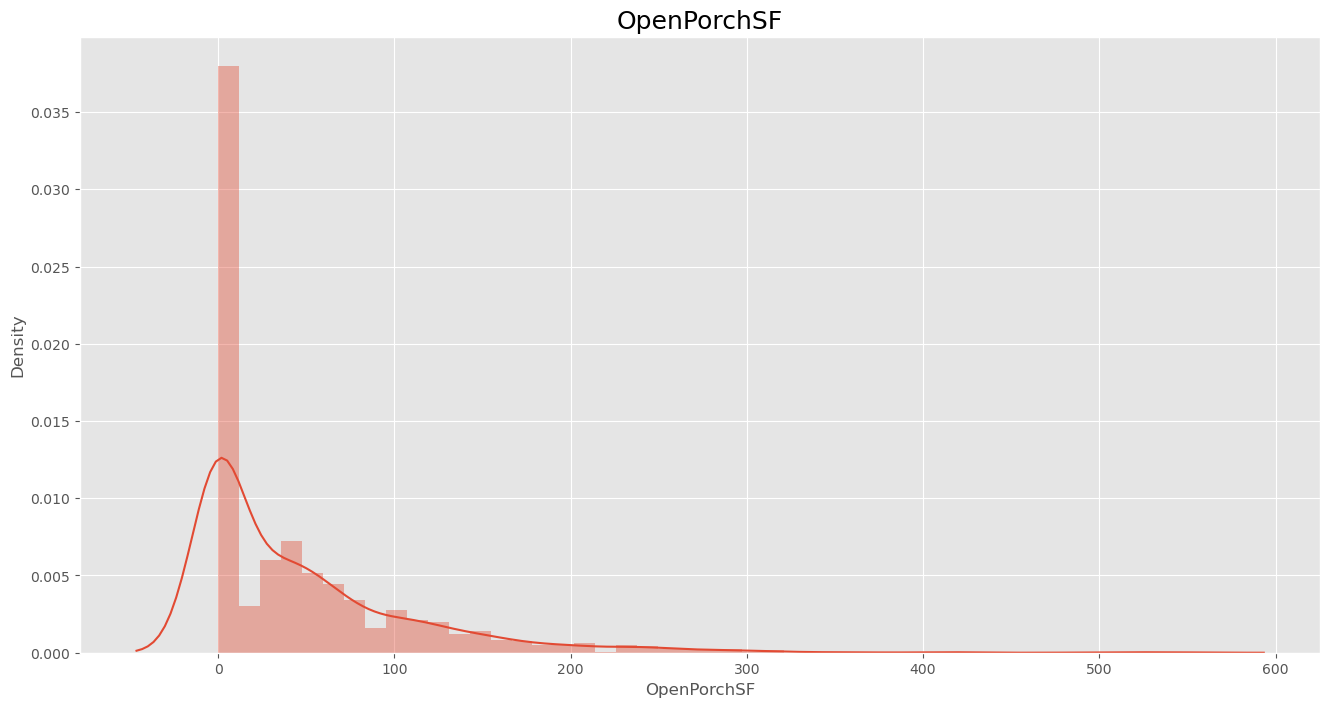

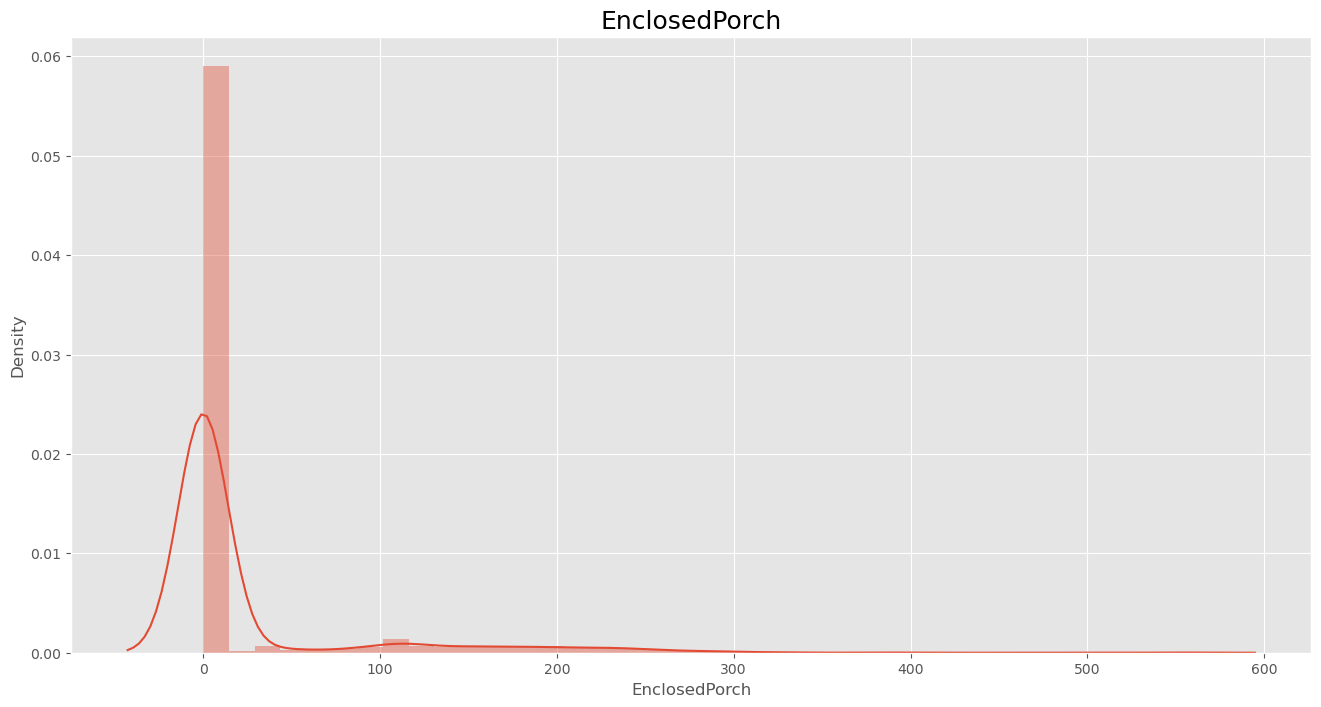

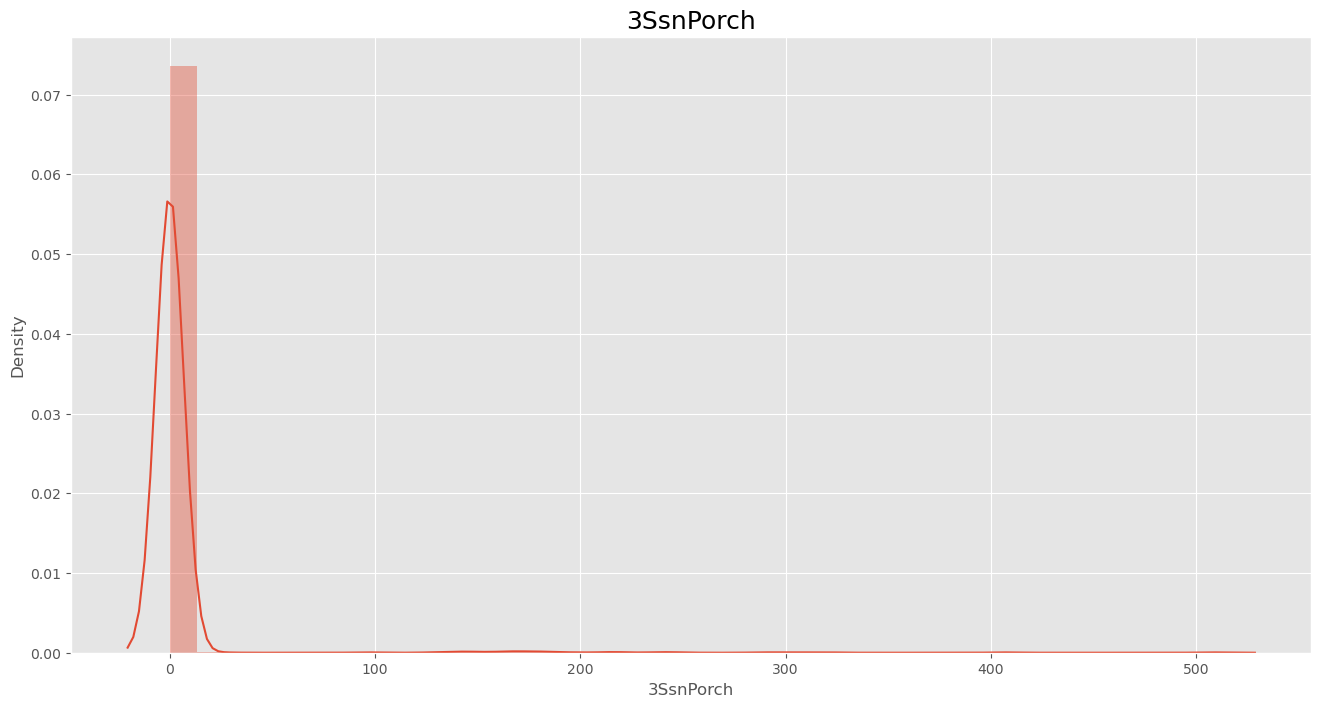

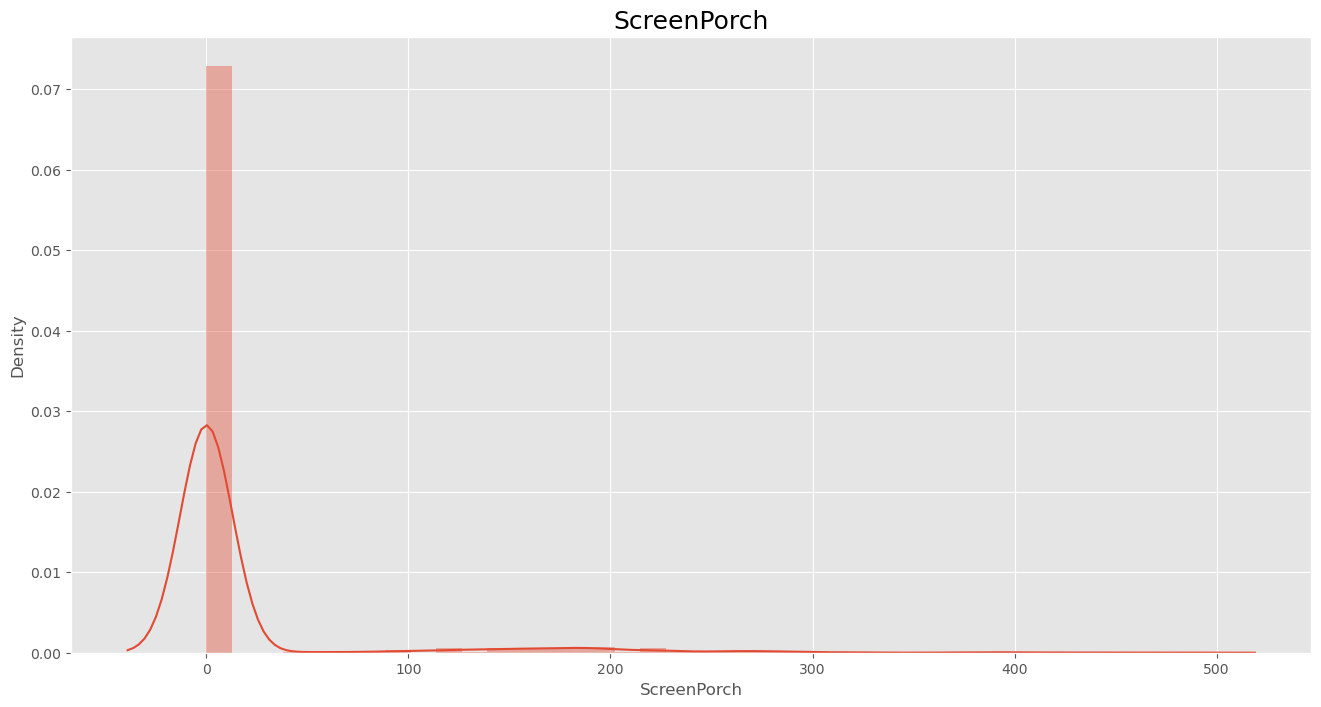

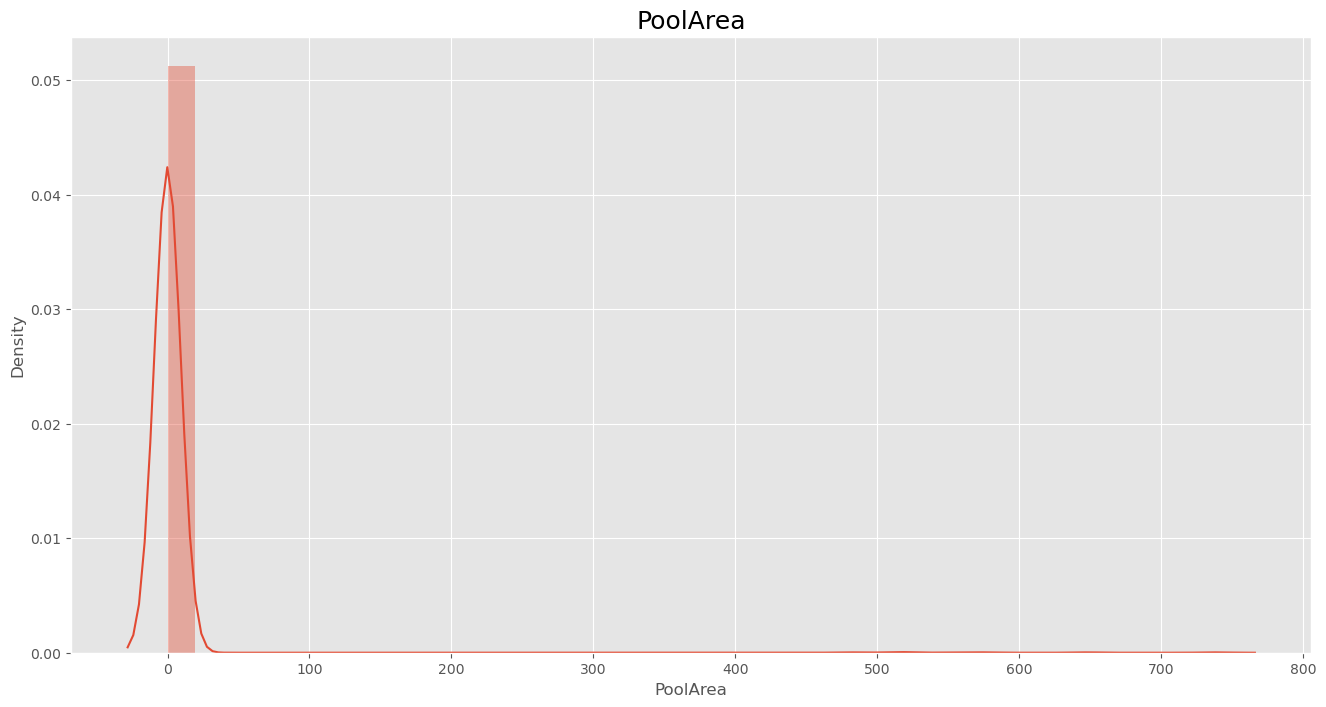

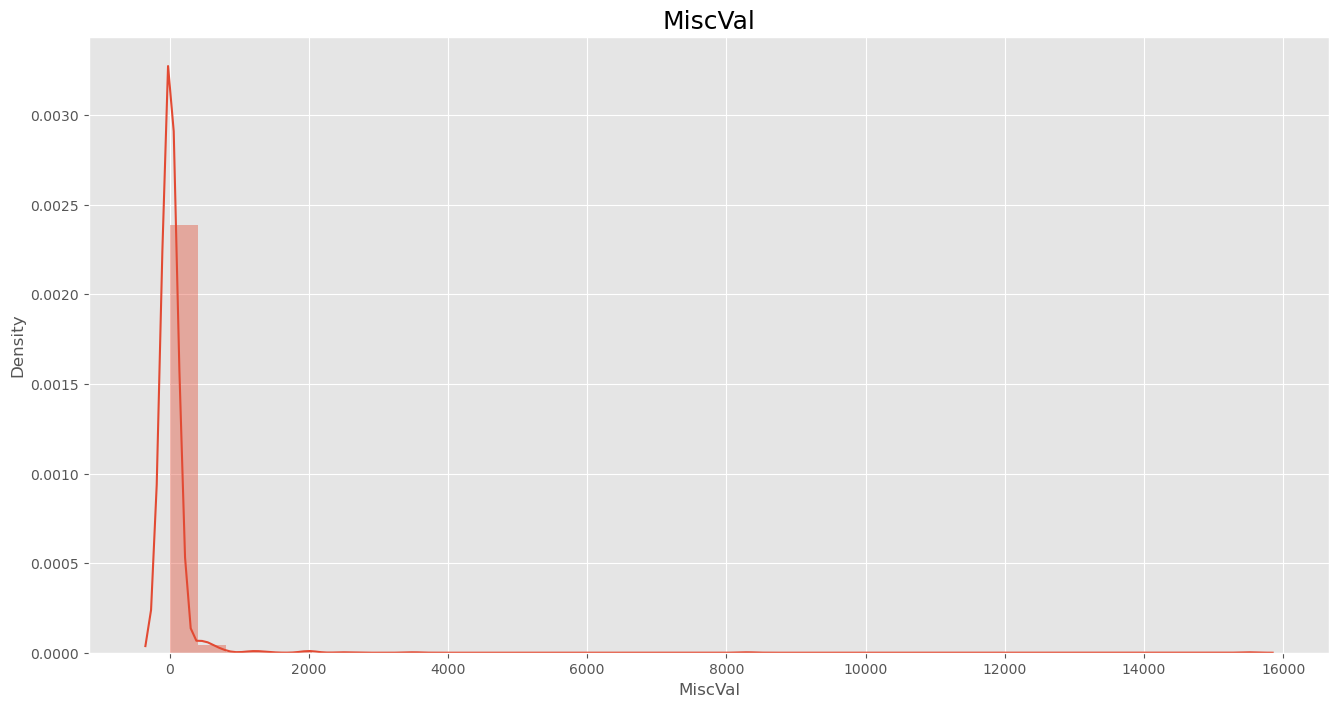

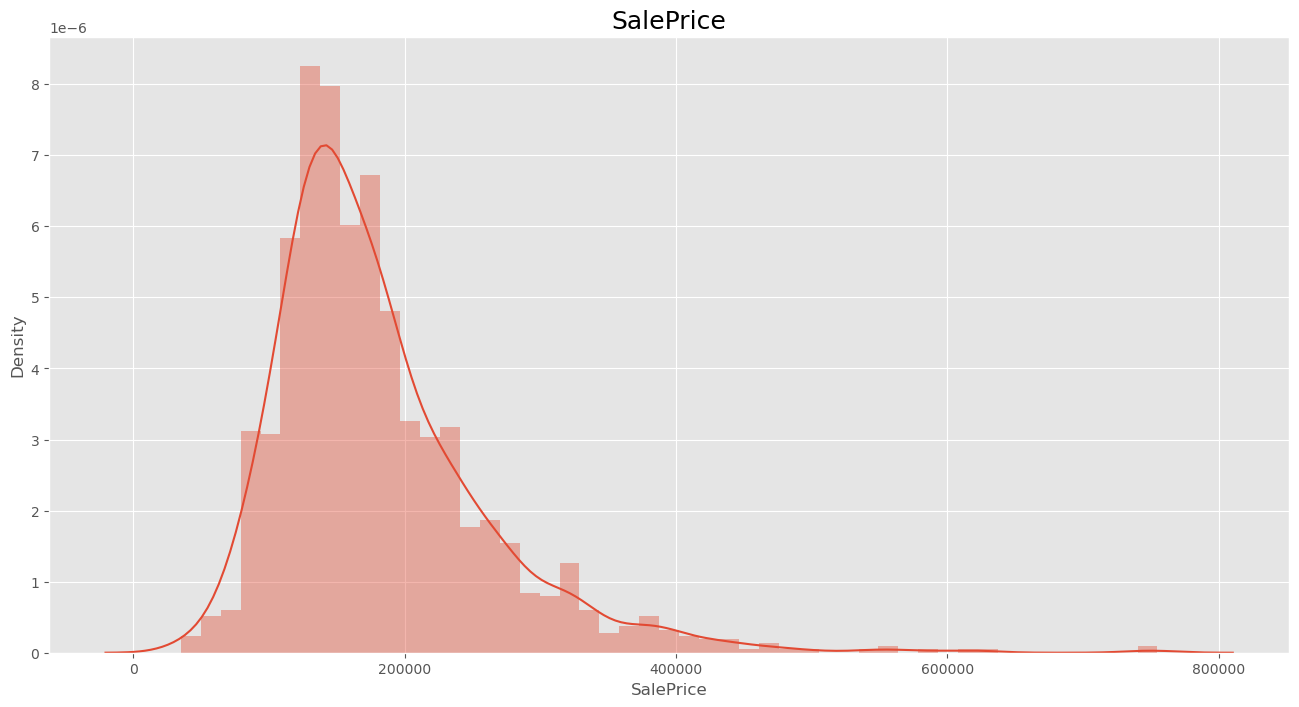

In [1853]:
## View the distribution of all numeric variables using histograms and boxplots

for col in df_numeric.columns:
    plt.figure(figsize=(16,8))
    plt.title(col, fontdict={'fontsize': 18})
    sns.distplot(df_numeric[col])
    plt.show()    

In [1854]:
# # split into X and y
X = df.loc[:, ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive',
       'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']] # predictors in variable X

y = np.log(df['SalePrice']) # response variable in Y


In [1855]:
# creating dummy variables for categorical variables

# subset all categorical variables
df_categorical = df.select_dtypes(include=['object'])
df_categorical.head()


,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,Fence,MiscFeature,SaleType,SaleCondition
0,60,RL,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,Attchd,RFn,2,TA,TA,Y,NA,NA,WD,Normal
1,20,RL,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,Attchd,RFn,2,TA,TA,Y,NA,NA,WD,Normal
2,60,RL,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,Attchd,RFn,2,TA,TA,Y,NA,NA,WD,Normal
3,70,RL,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,Detchd,Unf,3,TA,TA,Y,NA,NA,WD,Abnorml
4,60,RL,Pave,NA,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,Attchd,RFn,3,TA,TA,Y,NA,NA,WD,Normal


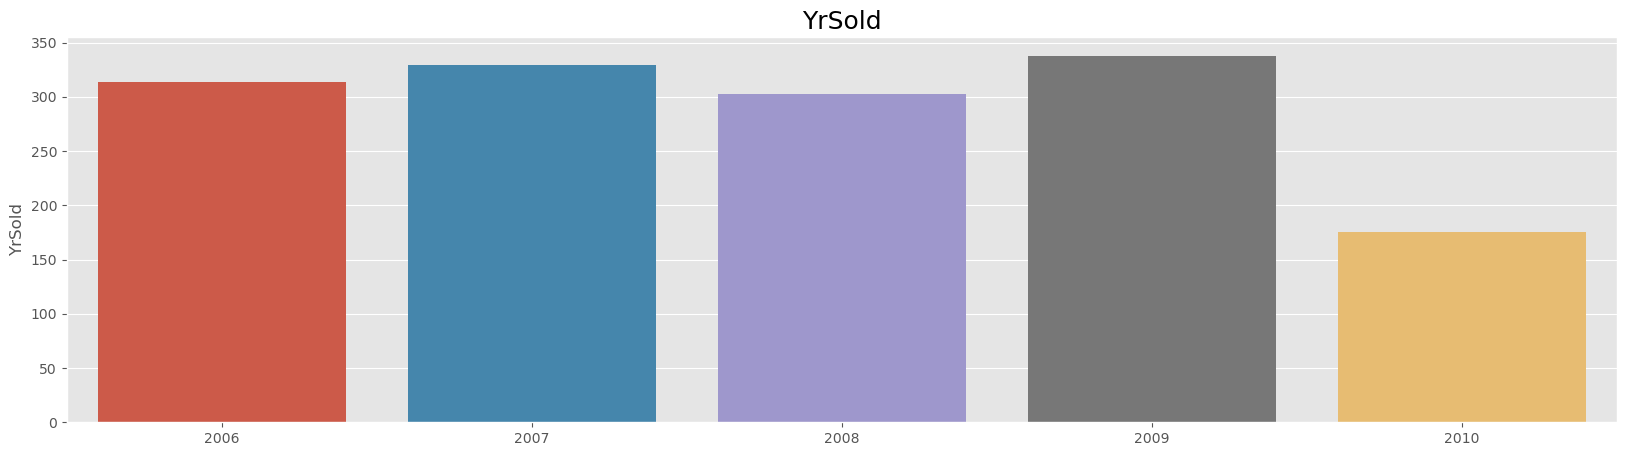

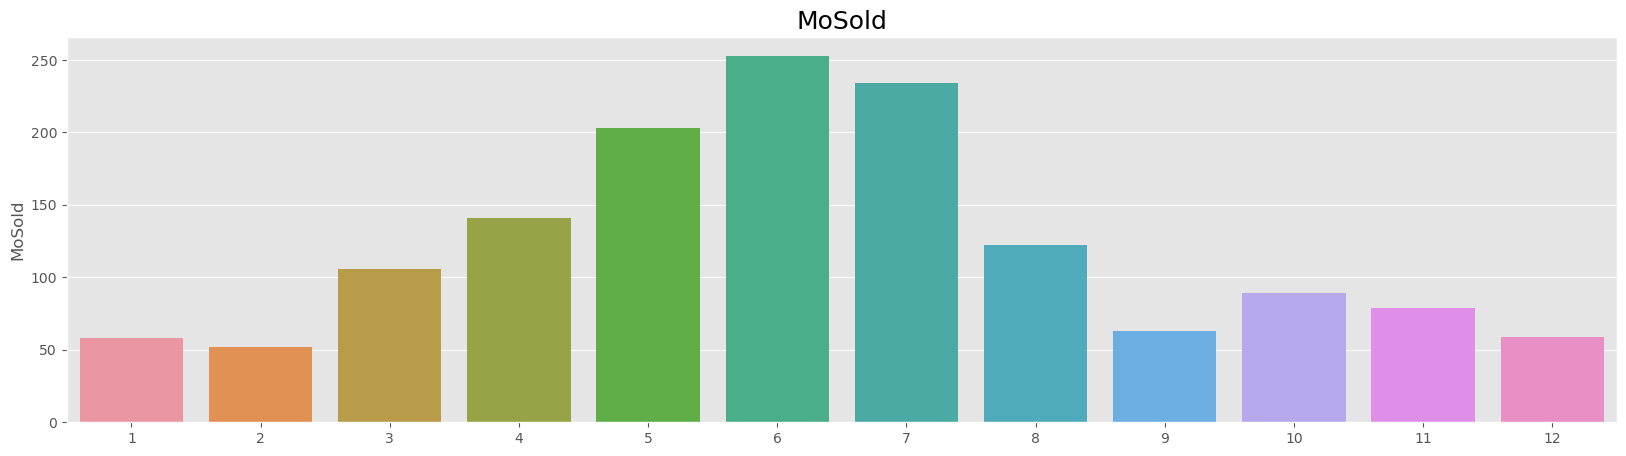

In [1856]:
## Visualizing the levels of categorical columns using bar plots
df_bar_Plots = ['YrSold', 'MoSold']

for col in df_bar_Plots:
    plt.figure(figsize=(20,5))
    plt.title(col, fontdict={'fontsize': 18})
    sns.barplot(x= df[col].value_counts().index, y=df[col].value_counts())
    plt.show()

In [1857]:
# convert into dummies - one hot encoding
df_dummies = pd.get_dummies(df_categorical, drop_first=True)
df_dummies.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [1858]:
# drop categorical variables 
X = X.drop(list(df_categorical.columns), axis=1)

In [1859]:
# concat dummy variables with X
X = pd.concat([X, df_dummies], axis=1)

In [1860]:
X.shape

(1459, 289)

In [1861]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

### Common Re-usable functions

In [1862]:
### Draw Table to show the metrics
def draw_table(tableString, metric_d, seriesStr, seriesMetrics):
    lr_table =  {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'RMSE (Train)','RMSE (Test)'], 
        tableString: metric_d
        }
    lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', tableString] )
    final_arr = []
    final_arr.append(lr_metric)

    for i in range(len(seriesStr)):
        lr_data = pd.Series(seriesMetrics[i], name = seriesStr[i])
        final_arr.append(lr_data)
    
    final_metric = pd.concat(final_arr, axis=1)
    
    return final_metric


In [1863]:
### Lets write a method to return the output metrics such as R2 score, RSS and RMSE

def get_metrics_data(y_train, y_pred_train, y_test, y_pred_test):
    metric = []
    
    
    ## R-square value of train and test
    r2Score_train = r2_score(y_train, y_pred_train)
    print("R-Squared [Train data] -> ", r2Score_train)
    metric.append(r2Score_train)
    
    r2Score_test = r2_score(y_test, y_pred_test)
    print("R-Squared [Test data] -> ", r2Score_test)
    metric.append(r2Score_test)
    
    
    ## RSS of train and test data
    rss_train = np.sum(np.square(y_train - y_pred_train))
    print("RSS [Train data] -> ",  rss_train)
    metric.append(rss_train)
    
    rss_test = np.sum(np.square(y_test - y_pred_test))
    print("RSS [Test data] -> ", rss_test)
    metric.append(rss_test)
    
    
    ## RMSE of train and test data
    mse_train = mean_squared_error(y_train, y_pred_train)
    rmse_train = mse_train**0.5
    print("RMSE [Train data] -> ", rmse_train) 
    metric.append(rmse_train)

    mse_test = mean_squared_error(y_test, y_pred_test)
    rmse_test = mse_test**0.5
    print("RMSE [Test data] -> ", rmse_test)  
    metric.append(rmse_test)
        

    return metric

## Linear Regression

Let's now try predicting prices, a dataset using linear regression.

In [1864]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [1865]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

91243239784.58017
[-1.19166529e-01 -1.42100548e-01  4.18431714e+10 -3.18820257e-02
 -5.66679112e-02 -1.89301004e-02  2.00381773e-03 -5.47874978e-02
  1.39260566e-02 -4.85463500e+10 -7.65829086e-02 -1.99505806e-01
 -7.10949898e-02 -2.12465198e+10  5.23427963e-01  5.41168451e-01
  4.82925415e-01  4.57715034e-01  1.58725083e-02  2.19399929e-02
  7.42117465e-02  1.17712021e-02  8.37455988e-02  2.49099731e-03
  2.71077752e-02  5.66920042e-02  3.70869637e-02 -2.50465363e-01
  1.99943781e-02 -6.37215376e-02 -1.41561911e-01 -3.00318003e-02
  2.74018049e-02  5.13889790e-02  4.93753403e-02  2.33999491e-02
  9.65318680e-02  1.81978583e-01  7.95528889e-02  2.12015152e-01
  2.40963697e-02  5.64596653e-02  4.94289398e-02 -9.72559452e-02
  7.06102848e-02  5.54561615e-02 -6.85842335e-03  2.66149640e-02
  2.13302135e-01  1.55237198e-01  5.38177490e-02  9.38225538e-02
  5.78799248e-02  7.95890391e-02  1.22911453e-01  1.84012711e-01
  5.91533184e-02  1.25857487e-01  3.73568535e-02  8.35331082e-02
  1.062

In [1866]:
from sklearn.metrics import r2_score, mean_squared_error

In [1867]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)
print("\n************   LINEAR REGRESSION ******************\n")
metric = get_metrics_data(y_train, y_pred_train, y_test, y_pred_test)


************   LINEAR REGRESSION ******************

R-Squared [Train data] ->  0.9382938602550489
R-Squared [Test data] ->  -5.176203223787113e+20
RSS [Train data] ->  10.292650066876137
RSS [Test data] ->  3.4123170543159237e+22
RMSE [Train data] ->  0.10040393475592588
RMSE [Test data] ->  8826481862.101536


### Model Building and Evaluation

#### Ridge and Lasso Regression

Predict price, a dataset used in simple linear regression, to perform ridge and lasso regression.



### Ridge Regression
list of alphas to tune - 
- if value too high it will lead to underfitting
- if it is too low, it will not handle the overfitting

In [1868]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


In [1869]:
ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [1870]:
print(model_cv.best_params_)
print(model_cv.best_score_)


{'alpha': 7.0}
-0.106335649720285


In [1871]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1000]
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.014775,0.006207,0.005888,0.002908,0.0001,{'alpha': 0.0001},-0.109175,-0.125736,-0.131729,-0.118606,...,-0.121938,0.007623,25,-0.073060,-0.069023,-0.068352,-0.072587,-0.071326,-0.070870,0.001882
1,0.016869,0.004550,0.005992,0.002291,0.001,{'alpha': 0.001},-0.109045,-0.125419,-0.131391,-0.118538,...,-0.121783,0.007561,24,-0.073090,-0.069056,-0.068369,-0.072594,-0.071355,-0.070893,0.001880
2,0.014895,0.005580,0.003888,0.003281,0.01,{'alpha': 0.01},-0.108044,-0.122857,-0.128764,-0.117897,...,-0.120499,0.007148,23,-0.073375,-0.069381,-0.068587,-0.072661,-0.071600,-0.071121,0.001851
3,0.014861,0.002887,0.002165,0.002781,0.05,{'alpha': 0.05},-0.106510,-0.117520,-0.124795,-0.115675,...,-0.117841,0.006763,22,-0.074183,-0.070422,-0.069388,-0.072967,-0.072259,-0.071844,0.001730
4,0.011352,0.005901,0.008971,0.004043,0.1,{'alpha': 0.1},-0.105350,-0.115473,-0.122920,-0.113801,...,-0.116267,0.006735,21,-0.074707,-0.071239,-0.070197,-0.073369,-0.072711,-0.072444,0.001584
5,0.015467,0.002693,0.006645,0.002401,0.2,{'alpha': 0.2},-0.103903,-0.113780,-0.121587,-0.111011,...,-0.114477,0.006827,19,-0.075368,-0.072295,-0.071253,-0.074069,-0.073407,-0.073279,0.001420
6,0.011001,0.003482,0.004670,0.002555,0.3,{'alpha': 0.3},-0.103119,-0.113274,-0.120778,-0.109044,...,-0.113410,0.006847,18,-0.075899,-0.073086,-0.072010,-0.074713,-0.073995,-0.073940,0.001334
7,0.013097,0.003856,0.007761,0.004441,0.4,{'alpha': 0.4},-0.102516,-0.113072,-0.120243,-0.107465,...,-0.112642,0.006930,17,-0.076349,-0.073738,-0.072588,-0.075285,-0.074494,-0.074491,0.001286
8,0.016705,0.004937,0.002010,0.001793,0.5,{'alpha': 0.5},-0.101956,-0.112884,-0.119953,-0.106198,...,-0.112028,0.007066,16,-0.076756,-0.074273,-0.073065,-0.075803,-0.074925,-0.074964,0.001265
9,0.015018,0.002090,0.006488,0.004545,0.6,{'alpha': 0.6},-0.101469,-0.112789,-0.119775,-0.105221,...,-0.111546,0.007195,15,-0.077132,-0.074733,-0.073473,-0.076258,-0.075309,-0.075381,0.001257


In [1872]:
alpha = 7
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_


array([-1.02674125e-01, -3.19037619e-02,  1.79624807e-03,  7.32787191e-03,
       -9.56478543e-03,  4.37902346e-02,  4.54974199e-02, -1.68408089e-02,
       -4.53050798e-04,  5.40750095e-04, -1.80820978e-02, -7.42543248e-02,
       -3.72678425e-02,  2.27814201e-03,  7.67750148e-02,  8.66391095e-02,
        7.41178876e-02,  5.33545542e-02,  3.40006738e-02, -4.40723967e-03,
        6.60490062e-02,  1.85044002e-02,  4.69524357e-03, -4.40168056e-03,
        3.61399065e-02,  2.41239773e-02,  3.14561622e-02, -1.94938702e-02,
        2.54660080e-02, -4.60077666e-02, -2.59618547e-02, -2.39595010e-02,
        1.50862810e-02,  1.21499547e-02, -6.26473861e-03, -3.34360228e-02,
        8.35598100e-03,  7.82876572e-02, -4.35274223e-03,  1.05762674e-01,
       -6.47234606e-02, -4.10319631e-02, -9.87591496e-02, -1.01604735e-01,
       -6.36516160e-03, -1.75723312e-02, -1.16297408e-02, -2.61625215e-02,
        1.11132384e-01,  9.15251112e-02, -3.62838114e-02,  1.77878170e-02,
       -2.27412809e-02, -

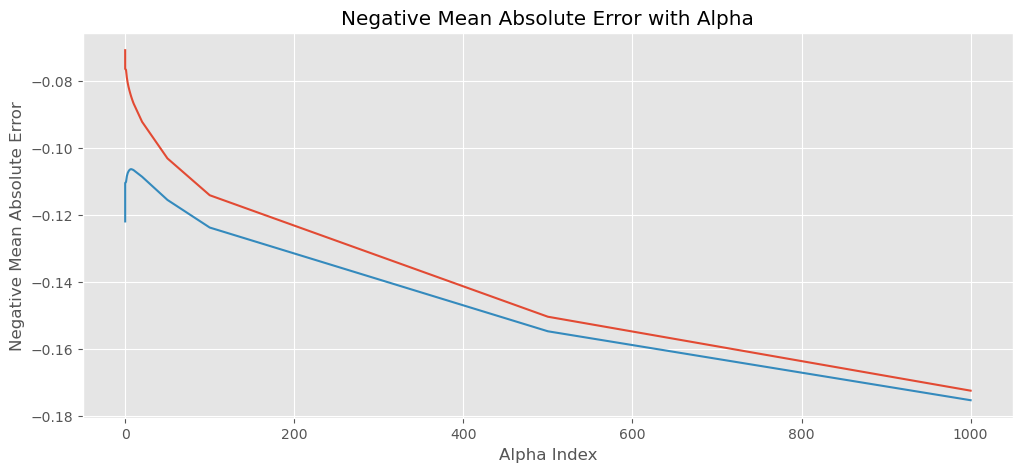

In [1873]:
# plotting mean train and test scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.figure(figsize=(12,5))

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('Alpha Index')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error with Alpha")
plt.show()

In [1874]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

print("\n************   RIDGE REGRESSION ******************\n")

metric2 = get_metrics_data(y_train, y_pred_train, y_test, y_pred_test)



************   RIDGE REGRESSION ******************

R-Squared [Train data] ->  0.916407449952894
R-Squared [Test data] ->  0.8569790926345552
RSS [Train data] ->  13.943326699562197
RSS [Test data] ->  9.428391047014983
RMSE [Train data] ->  0.11686119703620516
RMSE [Test data] ->  0.14671743917017913


### Lasso Regression

In [1875]:
lasso = Lasso()

# cross validation
model_cv_lasso = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv_lasso.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [1876]:
print(model_cv_lasso.best_params_)
print(model_cv_lasso.best_score_)


{'alpha': 0.001}
-0.10777995513771635


In [1877]:
# cv results
cv_resultsLasso = pd.DataFrame(model_cv_lasso.cv_results_)
cv_resultsLasso

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.113271,0.026765,0.010236,0.002152,0.0001,{'alpha': 0.0001},-0.099003,-0.112009,-0.120494,-0.102245,...,-0.110053,0.008218,2,-0.078415,-0.075156,-0.074223,-0.077546,-0.076583,-0.076385,0.001529
1,0.029343,0.007551,0.007033,0.004510,0.001,{'alpha': 0.001},-0.097864,-0.114425,-0.120023,-0.099766,...,-0.107780,0.008456,1,-0.095780,-0.091869,-0.087949,-0.093877,-0.091331,-0.092161,0.002629
2,0.014496,0.002365,0.003609,0.003392,0.01,{'alpha': 0.01},-0.147376,-0.158702,-0.165985,-0.138656,...,-0.153955,0.009702,3,-0.150533,-0.146711,-0.144151,-0.149471,-0.146716,-0.147516,0.002260
3,0.012024,0.003533,0.005042,0.004518,0.05,{'alpha': 0.05},-0.218724,-0.215578,-0.227351,-0.192418,...,-0.214515,0.011729,4,-0.213267,-0.213400,-0.212580,-0.214128,-0.212928,-0.213260,0.000519
4,0.011701,0.001856,0.004130,0.002418,0.1,{'alpha': 0.1},-0.298905,-0.293399,-0.303638,-0.256715,...,-0.290546,0.017232,5,-0.289953,-0.289727,-0.287362,-0.291240,-0.290225,-0.289702,0.001279
5,0.014014,0.004214,0.005596,0.003320,0.2,{'alpha': 0.2},-0.321602,-0.314517,-0.329712,-0.286533,...,-0.315542,0.015337,6,-0.313863,-0.315147,-0.311874,-0.322257,-0.313254,-0.315279,0.003644
6,0.013865,0.004302,0.005196,0.003546,0.3,{'alpha': 0.3},-0.321602,-0.314517,-0.329712,-0.286533,...,-0.315542,0.015337,6,-0.313863,-0.315147,-0.311874,-0.322257,-0.313254,-0.315279,0.003644
7,0.012846,0.004313,0.002904,0.002624,0.4,{'alpha': 0.4},-0.321602,-0.314517,-0.329712,-0.286533,...,-0.315542,0.015337,6,-0.313863,-0.315147,-0.311874,-0.322257,-0.313254,-0.315279,0.003644
8,0.013625,0.001788,0.006218,0.004438,0.5,{'alpha': 0.5},-0.321602,-0.314517,-0.329712,-0.286533,...,-0.315542,0.015337,6,-0.313863,-0.315147,-0.311874,-0.322257,-0.313254,-0.315279,0.003644
9,0.015989,0.003196,0.006390,0.003514,0.6,{'alpha': 0.6},-0.321602,-0.314517,-0.329712,-0.286533,...,-0.315542,0.015337,6,-0.313863,-0.315147,-0.311874,-0.322257,-0.313254,-0.315279,0.003644


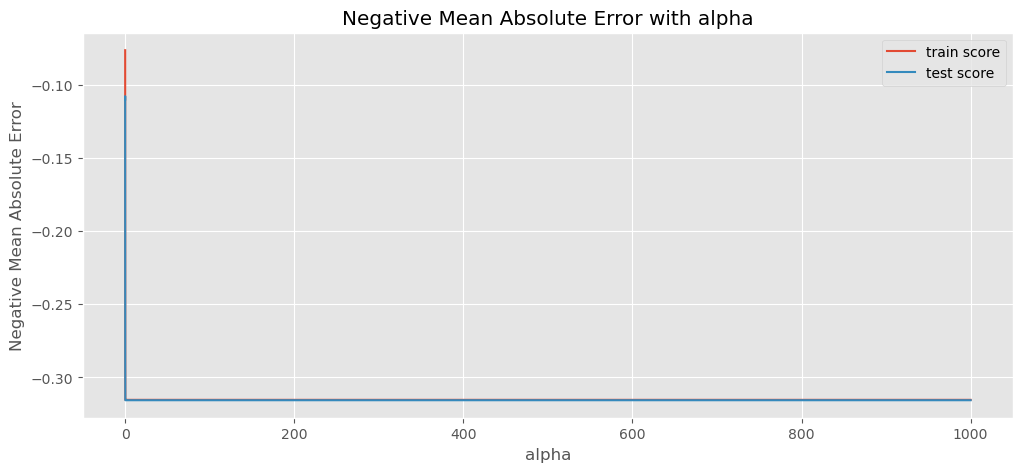

In [1878]:
# plotting mean test and train scoes with alpha 
cv_resultsLasso['param_alpha'] = cv_resultsLasso['param_alpha'].astype('float32')

# plotting
plt.figure(figsize=(12,5))
plt.plot(cv_resultsLasso['param_alpha'], cv_resultsLasso['mean_train_score'])
plt.plot(cv_resultsLasso['param_alpha'], cv_resultsLasso['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error with alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [1879]:
#Fitting Ridge model for alpha = 0.001 and printing coefficients which have been penalised

alpha =0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001)

In [1880]:
lasso.coef_

array([-1.34531496e-01, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  3.38652991e-03,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -5.26453123e-02,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        2.31734535e-02, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        5.65162531e-02,  0.00000000e+00,  0.00000000e+00, -3.87789920e-03,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        2.92297450e-02, -0.00000000e+00, -0.00000000e+00, -1.61168051e-02,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  7.25686586e-02,  0.00000000e+00,  1.22150115e-01,
       -4.81773105e-02, -1.85171877e-02, -9.94794994e-02, -1.04171356e-01,
        0.00000000e+00, -2.33277158e-03, -0.00000000e+00,  0.00000000e+00,
        1.02620046e-01,  9.34324209e-02, -9.66568923e-03,  0.00000000e+00,
       -8.88706540e-04, -

In [1881]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)
print("\n************   LASSO REGRESSION ******************\n")

metric3 = get_metrics_data(y_train, y_pred_train, y_test, y_pred_test)


************   LASSO REGRESSION ******************

R-Squared [Train data] ->  0.8976061604973655
R-Squared [Test data] ->  0.846128706426312
RSS [Train data] ->  17.079401877359
RSS [Test data] ->  10.143682860407385
RMSE [Train data] ->  0.12933720089410258
RMSE [Test data] ->  0.152181120013625


In [1882]:
# Creating a table which contain all the metrics

draw_table('Linear Regression', metric, ['Ridge Regression', 'Lasso Regression'], [metric2, metric3])

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.382939e-01,0.916407,0.897606
1,R2 Score (Test),-5.176203e+20,0.856979,0.846129
2,RSS (Train),1.029265e+01,13.943327,17.079402
3,RSS (Test),3.412317e+22,9.428391,10.143683
4,RMSE (Train),1.004039e-01,0.116861,0.129337
5,RMSE (Test),8.826482e+09,0.146717,0.152181


## Lets observe the changes in the coefficients


In [1883]:
betas = pd.DataFrame(index=X.columns)

In [1884]:
betas.rows = X.columns

In [1885]:
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

### Top ten coefficients of Ridge regression


In [1886]:
betas['Ridge'].sort_values(ascending=False)[:10]

FullBath_3              0.158822
OverallQual_9           0.154709
TotRmsAbvGrd_10         0.120687
OverallQual_10          0.111178
Neighborhood_NoRidge    0.111132
Neighborhood_Crawfor    0.105763
CentralAir_Y            0.100462
Neighborhood_StoneBr    0.098619
OverallQual_8           0.093166
Neighborhood_NridgHt    0.091525
Name: Ridge, dtype: float64

### Top ten coefficients of Lasso regression


In [1887]:
betas['Lasso'].sort_values(ascending=False)[:10]

OverallQual_9           0.257618
OverallQual_10          0.191193
FullBath_3              0.176308
OverallQual_8           0.143808
Neighborhood_Crawfor    0.122150
CentralAir_Y            0.117224
TotRmsAbvGrd_10         0.114791
Neighborhood_NoRidge    0.102620
BsmtExposure_Gd         0.100626
Neighborhood_NridgHt    0.093432
Name: Lasso, dtype: float64

#### CHANGES FOR SUBJECTIVE QUESTIONS  - Q1 [please refer pdf]

In [1888]:
## Ridge regression model with double value of alpha = 2*7
ridge2 = Ridge(alpha=14)

# Fit the model on training data
ridge2.fit(X_train, y_train)

Ridge(alpha=14)

In [1889]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge2.predict(X_train)
y_pred_test = ridge2.predict(X_test)

metric_double = get_metrics_data(y_train, y_pred_train, y_test, y_pred_test)
 

R-Squared [Train data] ->  0.9068491399788395
R-Squared [Test data] ->  0.8522629194786264
RSS [Train data] ->  15.537663020069498
RSS [Test data] ->  9.739296113823944
RMSE [Train data] ->  0.12336159560969821
RMSE [Test data] ->  0.1491168530928358


In [1890]:
## Lasso Regression model with double value of alpha = 2 * 0.001
lasso2 = Lasso(alpha=0.002)

# Fit the model on training data
lasso2.fit(X_train, y_train)

Lasso(alpha=0.002)

In [1891]:
metric_double_lasso = get_metrics_data(y_train, y_pred_train, y_test, y_pred_test)


R-Squared [Train data] ->  0.9068491399788395
R-Squared [Test data] ->  0.8522629194786264
RSS [Train data] ->  15.537663020069498
RSS [Test data] ->  9.739296113823944
RMSE [Train data] ->  0.12336159560969821
RMSE [Test data] ->  0.1491168530928358


In [1892]:
# Combining to table
draw_table('Ridge Regression', metric2, ['Ridge Regression (2X Alpha)', 'Lasso Regression', 'Lasso Regression (2X Alpha)'],
           [metric_double, metric3, metric_double_lasso])

,Metric,Ridge Regression,Ridge Regression (2X Alpha),Lasso Regression,Lasso Regression (2X Alpha)
0,R2 Score (Train),0.916407,0.906849,0.897606,0.906849
1,R2 Score (Test),0.856979,0.852263,0.846129,0.852263
2,RSS (Train),13.943327,15.537663,17.079402,15.537663
3,RSS (Test),9.428391,9.739296,10.143683,9.739296
4,RMSE (Train),0.116861,0.123362,0.129337,0.123362
5,RMSE (Test),0.146717,0.149117,0.152181,0.149117


In [1893]:
## Lets observe the changes in the coefficients
betas_2 = pd.DataFrame(index=X.columns)


In [1894]:
betas_2.rows = X.columns

In [1895]:
betas_2['Ridge2'] = ridge2.coef_
betas_2['Lasso2'] = lasso2.coef_

### Top 10 Ridge regression coefficients with 2x Alpha

In [1896]:
betas_2['Ridge2'].sort_values(ascending=False)[:10]

FullBath_3              0.129386
OverallQual_9           0.127257
TotRmsAbvGrd_10         0.108140
CentralAir_Y            0.096613
Neighborhood_NoRidge    0.090643
Neighborhood_Crawfor    0.088717
OverallQual_10          0.087615
Neighborhood_NridgHt    0.084298
BsmtExposure_Gd         0.083449
OverallQual_8           0.082174
Name: Ridge2, dtype: float64

### Top ten lasso regression coeffients with 2x Alpha

In [1897]:
betas_2['Lasso2'].sort_values(ascending=False)[:10]

OverallQual_9           0.230837
OverallQual_10          0.154209
OverallQual_8           0.138221
FullBath_3              0.137802
CentralAir_Y            0.132348
GarageCars_3            0.107385
BsmtExposure_Gd         0.104751
TotRmsAbvGrd_10         0.096818
Neighborhood_Crawfor    0.094004
Neighborhood_NridgHt    0.086667
Name: Lasso2, dtype: float64

### Changes for subjective questions - Q3 - [please refer pdf]

In [1898]:
top_5_lasso = ['OverallQual_9', 'OverallQual_10','FullBath_3','OverallQual_8','Neighborhood_Crawfor']

In [1899]:
X_train_modified =  X_train.drop(top_5_lasso, axis=1)
X_test_modified = X_test.drop(top_5_lasso, axis=1)

In [1900]:
lassoModified = Lasso()

# cross validation
model_cv_lasso_modified = GridSearchCV(estimator = lassoModified, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv_lasso_modified.fit(X_train_modified, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [1901]:
model_cv_lasso_modified.best_params_

{'alpha': 0.001}

In [1902]:
lasso_modified = Lasso(alpha=0.001)

In [1903]:
lasso_modified.fit(X_train_modified, y_train)

Lasso(alpha=0.001)

In [1904]:
y_train_pred_mod = lasso_modified.predict(X_train_modified)
y_test_pred_mod = lasso_modified.predict(X_test_modified)

In [1905]:
modified_metrics = get_metrics_data(y_train, y_train_pred_mod, y_test, y_test_pred_mod)

R-Squared [Train data] ->  0.8904112976971699
R-Squared [Test data] ->  0.8342593753742075
RSS [Train data] ->  18.279512682988493
RSS [Test data] ->  10.926146744095183
RMSE [Train data] ->  0.1338041044851391
RMSE [Test data] ->  0.15794157309471385


In [1906]:
betas = pd.DataFrame(index=X_train_modified.columns)
betas.rows = X_train_modified.columns
betas['Lasso_modified'] = lasso_modified.coef_

In [1907]:
### arrange in sort order to get top 5
betas['Lasso_modified'].sort_values(ascending=False)[:5]

TotRmsAbvGrd_10         0.131094
CentralAir_Y            0.124631
Neighborhood_NridgHt    0.121757
Neighborhood_NoRidge    0.121068
BsmtExposure_Gd         0.111180
Name: Lasso_modified, dtype: float64